# <H1 align = 'left'>US Census Income Prediction (1994 - 1995)</H1>

### Methodology - 
1. Data Exploration
2. Data Cleaning
3. Data Manupulation and Data Distribution
4. Encoding
5. Exploratory Data Analysis
6. Machine Learning - 

A) Normalization

B) Data Sampling:
* Undersampling
* Oversampling
* SMOTE

C) Principal Component Analysis

D) Logistic Regression

E) SVM

F) Naive Bayes

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
from math import exp
from math import sqrt
from math import pi
from sklearn.metrics import *
import sklearn.metrics 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings("ignore")

In [188]:
data = pd.read_csv("/content/drive/MyDrive/NEU ML - Census Income Prediction/Census Income/Census_income_data.csv")
data.head()

,age,class_worker,det_ind_code,det_occu_code,education,wage_per_hour,hs_college,marital_stat,major_ind_code,major_occ_code,...,country_father,country_mother,country_self,citizenship,own_or_self,vet_question,vet_benefits,weeks_worked,year,income_50k
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


## 1. Data Exploration

In [189]:
data.columns

Index(['age', 'class_worker', 'det_ind_code', 'det_occu_code', 'education',
       'wage_per_hour', 'hs_college', 'marital_stat', 'major_ind_code',
       'major_occ_code', 'race', 'hisp_origin', 'sex', 'union_member',
       'unemp_reason', 'full_or_part_emp', 'capital_gains', 'capital_losses',
       'stock_dividends', 'tax_filer_stat', 'region_prev_res',
       'state_prev_res', 'det_hh_fam_stat', 'det_hh_summ', 'instance weight',
       'mig_chg_msa', 'mig_chg_reg', 'mig_move_reg', 'mig_same',
       'mig_prev_sunbelt', 'num_emp', 'fam_under_18', 'country_father',
       'country_mother', 'country_self', 'citizenship', 'own_or_self',
       'vet_question', 'vet_benefits', 'weeks_worked', 'year', 'income_50k'],
      dtype='object')

In [190]:
data.shape

(199523, 42)

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               199523 non-null  int64  
 1   class_worker      199523 non-null  object 
 2   det_ind_code      199523 non-null  int64  
 3   det_occu_code     199523 non-null  int64  
 4   education         199523 non-null  object 
 5   wage_per_hour     199523 non-null  int64  
 6   hs_college        199523 non-null  object 
 7   marital_stat      199523 non-null  object 
 8   major_ind_code    199523 non-null  object 
 9   major_occ_code    199523 non-null  object 
 10  race              199523 non-null  object 
 11  hisp_origin       199523 non-null  object 
 12  sex               199523 non-null  object 
 13  union_member      199523 non-null  object 
 14  unemp_reason      199523 non-null  object 
 15  full_or_part_emp  199523 non-null  object 
 16  capital_gains     19

In [192]:
data.describe()

,age,det_ind_code,det_occu_code,wage_per_hour,capital_gains,capital_losses,stock_dividends,instance weight,num_emp,own_or_self,vet_benefits,weeks_worked,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


### A. Which variables are important?

In [193]:
categorical = data.dtypes[data.dtypes == "object"].index
print(categorical)

Index(['class_worker', 'education', 'hs_college', 'marital_stat',
       'major_ind_code', 'major_occ_code', 'race', 'hisp_origin', 'sex',
       'union_member', 'unemp_reason', 'full_or_part_emp', 'tax_filer_stat',
       'region_prev_res', 'state_prev_res', 'det_hh_fam_stat', 'det_hh_summ',
       'mig_chg_msa', 'mig_chg_reg', 'mig_move_reg', 'mig_same',
       'mig_prev_sunbelt', 'fam_under_18', 'country_father', 'country_mother',
       'country_self', 'citizenship', 'vet_question', 'income_50k'],
      dtype='object')


In [194]:
data[categorical].describe(include = 'all')

,class_worker,education,hs_college,marital_stat,major_ind_code,major_occ_code,race,hisp_origin,sex,union_member,...,mig_move_reg,mig_same,mig_prev_sunbelt,fam_under_18,country_father,country_mother,country_self,citizenship,vet_question,income_50k
count,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,...,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523
unique,9,17,3,7,24,15,5,10,2,3,...,10,3,4,5,43,43,43,5,3,2
top,Not in universe,High school graduate,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,-50000
freq,100245,48407,186943,86485,100684,100684,167365,171907,103984,180459,...,99696,101212,99696,144232,159163,160479,176989,176992,197539,187141


### B. Checking for Frequency of values for Categorical Columns

To understand more about the attributes, we will try to dig in and find what values does the attributes hold. 


In [195]:
# Defining a function for counting the values for each attribute

def value_count(col):
  return data[col].value_counts()

#### 1. Class_worker

In [196]:
value_count('class_worker')

 Not in universe                   100245
 Private                            72028
 Self-employed-not incorporated      8445
 Local government                    7784
 State government                    4227
 Self-employed-incorporated          3265
 Federal government                  2925
 Never worked                         439
 Without pay                          165
Name: class_worker, dtype: int64

#### 2. Education

In [197]:
value_count('education')

 High school graduate                      48407
 Children                                  47422
 Some college but no degree                27820
 Bachelors degree(BA AB BS)                19865
 7th and 8th grade                          8007
 10th grade                                 7557
 11th grade                                 6876
 Masters degree(MA MS MEng MEd MSW MBA)     6541
 9th grade                                  6230
 Associates degree-occup /vocational        5358
 Associates degree-academic program         4363
 5th or 6th grade                           3277
 12th grade no diploma                      2126
 1st 2nd 3rd or 4th grade                   1799
 Prof school degree (MD DDS DVM LLB JD)     1793
 Doctorate degree(PhD EdD)                  1263
 Less than 1st grade                         819
Name: education, dtype: int64

#### 3. Hs_College

In [198]:
value_count('hs_college')

 Not in universe          186943
 High school                6892
 College or university      5688
Name: hs_college, dtype: int64

#### 4. maritial_stat - 

In [199]:
value_count('marital_stat')

 Never married                      86485
 Married-civilian spouse present    84222
 Divorced                           12710
 Widowed                            10463
 Separated                           3460
 Married-spouse absent               1518
 Married-A F spouse present           665
Name: marital_stat, dtype: int64

#### major_ind_code

In [200]:
value_count('major_ind_code')

 Not in universe or children            100684
 Retail trade                            17070
 Manufacturing-durable goods              9015
 Education                                8283
 Manufacturing-nondurable goods           6897
 Finance insurance and real estate        6145
 Construction                             5984
 Business and repair services             5651
 Medical except hospital                  4683
 Public administration                    4610
 Other professional services              4482
 Transportation                           4209
 Hospital services                        3964
 Wholesale trade                          3596
 Agriculture                              3023
 Personal services except private HH      2937
 Social services                          2549
 Entertainment                            1651
 Communications                           1181
 Utilities and sanitary services          1178
 Private household services                945
 Mining      

#### major_occ_code

In [201]:
value_count('major_occ_code')

 Not in universe                          100684
 Adm support including clerical            14837
 Professional specialty                    13940
 Executive admin and managerial            12495
 Other service                             12099
 Sales                                     11783
 Precision production craft & repair       10518
 Machine operators assmblrs & inspctrs      6379
 Handlers equip cleaners etc                4127
 Transportation and material moving         4020
 Farming forestry and fishing               3146
 Technicians and related support            3018
 Protective services                        1661
 Private household services                  780
 Armed Forces                                 36
Name: major_occ_code, dtype: int64

#### race - 

In [202]:
value_count('race')

 White                          167365
 Black                           20415
 Asian or Pacific Islander        5835
 Other                            3657
 Amer Indian Aleut or Eskimo      2251
Name: race, dtype: int64

hisp_origin - 

In [203]:
value_count('hisp_origin')

 All other                    171907
 Mexican-American               8079
 Mexican (Mexicano)             7234
 Central or South American      3895
 Puerto Rican                   3313
 Other Spanish                  2485
 Cuban                          1126
 NA                              874
 Do not know                     306
 Chicano                         304
Name: hisp_origin, dtype: int64

#### sex - 

In [204]:
value_count('sex')

 Female    103984
 Male       95539
Name: sex, dtype: int64

#### union_member

In [205]:
value_count('union_member')

 Not in universe    180459
 No                  16034
 Yes                  3030
Name: union_member, dtype: int64

#### unemp_reason

In [206]:
value_count('unemp_reason')

 Not in universe          193453
 Other job loser            2038
 Re-entrant                 2019
 Job loser - on layoff       976
 Job leaver                  598
 New entrant                 439
Name: unemp_reason, dtype: int64

#### full_or_part_emp

In [207]:
value_count('full_or_part_emp')

 Children or Armed Forces              123769
 Full-time schedules                    40736
 Not in labor force                     26808
 PT for non-econ reasons usually FT      3322
 Unemployed full-time                    2311
 PT for econ reasons usually PT          1209
 Unemployed part- time                    843
 PT for econ reasons usually FT           525
Name: full_or_part_emp, dtype: int64

#### tax_filer_stat

In [208]:
value_count('tax_filer_stat')

 Nonfiler                        75094
 Joint both under 65             67383
 Single                          37421
 Joint both 65+                   8332
 Head of household                7426
 Joint one under 65 & one 65+     3867
Name: tax_filer_stat, dtype: int64

#### region_prev_res

In [209]:
value_count('region_prev_res')

 Not in universe    183750
 South                4889
 West                 4074
 Midwest              3575
 Northeast            2705
 Abroad                530
Name: region_prev_res, dtype: int64

#### state_prev_res

In [210]:
value_count('state_prev_res')

 Not in universe         183750
 California                1714
 Utah                      1063
 Florida                    849
 North Carolina             812
 ?                          708
 Abroad                     671
 Oklahoma                   626
 Minnesota                  576
 Indiana                    533
 North Dakota               499
 New Mexico                 463
 Michigan                   441
 Alaska                     290
 Kentucky                   244
 Arizona                    243
 New Hampshire              242
 Wyoming                    241
 Colorado                   239
 Oregon                     236
 West Virginia              231
 Georgia                    227
 Montana                    226
 Alabama                    216
 Ohio                       211
 Texas                      209
 Arkansas                   205
 Mississippi                204
 Tennessee                  202
 Pennsylvania               199
 New York                   195
 Louisia

#### det_hh_fam_stat

In [211]:
value_count('det_hh_fam_stat')

 Householder                                        53248
 Child <18 never marr not in subfamily              50326
 Spouse of householder                              41695
 Nonfamily householder                              22213
 Child 18+ never marr Not in a subfamily            12030
 Secondary individual                                6122
 Other Rel 18+ ever marr not in subfamily            1956
 Grandchild <18 never marr child of subfamily RP     1868
 Other Rel 18+ never marr not in subfamily           1728
 Grandchild <18 never marr not in subfamily          1066
 Child 18+ ever marr Not in a subfamily              1013
 Child under 18 of RP of unrel subfamily              732
 RP of unrelated subfamily                            685
 Child 18+ ever marr RP of subfamily                  671
 Other Rel <18 never marr child of subfamily RP       656
 Other Rel 18+ ever marr RP of subfamily              656
 Other Rel 18+ spouse of subfamily RP                 638
 Child 18+ nev

#### det_hh_summ

In [212]:
value_count('det_hh_summ')

 Householder                             75475
 Child under 18 never married            50426
 Spouse of householder                   41709
 Child 18 or older                       14430
 Other relative of householder            9703
 Nonrelative of householder               7601
 Group Quarters- Secondary individual      132
 Child under 18 ever married                47
Name: det_hh_summ, dtype: int64

#### mig_chg_msa

In [213]:
value_count('mig_chg_msa')

 ?                   99696
 Nonmover            82538
 MSA to MSA          10601
 NonMSA to nonMSA     2811
 Not in universe      1516
 MSA to nonMSA         790
 NonMSA to MSA         615
 Abroad to MSA         453
 Not identifiable      430
 Abroad to nonMSA       73
Name: mig_chg_msa, dtype: int64

#### mig_chg_reg

In [214]:
value_count('mig_chg_reg')

 ?                                 99696
 Nonmover                          82538
 Same county                        9812
 Different county same state        2797
 Not in universe                    1516
 Different region                   1178
 Different state same division       991
 Abroad                              530
 Different division same region      465
Name: mig_chg_reg, dtype: int64

#### mig_move_reg

In [215]:
value_count('mig_move_reg')

 ?                               99696
 Nonmover                        82538
 Same county                      9812
 Different county same state      2797
 Not in universe                  1516
 Different state in South          973
 Different state in West           679
 Different state in Midwest        551
 Abroad                            530
 Different state in Northeast      431
Name: mig_move_reg, dtype: int64

#### mig_same

In [216]:
value_count('mig_same')

 Not in universe under 1 year old    101212
 Yes                                  82538
 No                                   15773
Name: mig_same, dtype: int64

#### mig_prev_sunbelt

In [217]:
value_count('mig_prev_sunbelt')

 ?                  99696
 Not in universe    84054
 No                  9987
 Yes                 5786
Name: mig_prev_sunbelt, dtype: int64

#### fam_under_18

In [218]:
value_count('fam_under_18')

 Not in universe           144232
 Both parents present       38983
 Mother only present        12772
 Father only present         1883
 Neither parent present      1653
Name: fam_under_18, dtype: int64

#### country_father

In [219]:
value_count('country_father')

 United-States                   159163
 Mexico                           10008
 ?                                 6713
 Puerto-Rico                       2680
 Italy                             2212
 Canada                            1380
 Germany                           1356
 Dominican-Republic                1290
 Poland                            1212
 Philippines                       1154
 Cuba                              1125
 El-Salvador                        982
 China                              856
 England                            793
 Columbia                           614
 India                              580
 South Korea                        530
 Ireland                            508
 Jamaica                            463
 Vietnam                            457
 Guatemala                          445
 Japan                              392
 Portugal                           388
 Ecuador                            379
 Haiti                              351


#### country_mother

In [220]:
value_count('country_mother')

 United-States                   160479
 Mexico                            9781
 ?                                 6119
 Puerto-Rico                       2473
 Italy                             1844
 Canada                            1451
 Germany                           1382
 Philippines                       1231
 Poland                            1110
 El-Salvador                       1108
 Cuba                              1108
 Dominican-Republic                1103
 England                            903
 China                              760
 Columbia                           612
 South Korea                        609
 Ireland                            599
 India                              581
 Vietnam                            473
 Japan                              469
 Jamaica                            453
 Guatemala                          444
 Ecuador                            375
 Peru                               355
 Haiti                              353


#### country_self

In [221]:
value_count('country_self')

 United-States                   176989
 Mexico                            5767
 ?                                 3393
 Puerto-Rico                       1400
 Germany                            851
 Philippines                        845
 Cuba                               837
 Canada                             700
 Dominican-Republic                 690
 El-Salvador                        689
 China                              478
 South Korea                        471
 England                            457
 Columbia                           434
 Italy                              419
 India                              408
 Vietnam                            391
 Poland                             381
 Guatemala                          344
 Japan                              339
 Jamaica                            320
 Peru                               268
 Ecuador                            258
 Haiti                              228
 Nicaragua                          218


#### citizenship

In [222]:
value_count('citizenship')

 Native- Born in the United States              176992
 Foreign born- Not a citizen of U S              13401
 Foreign born- U S citizen by naturalization      5855
 Native- Born abroad of American Parent(s)        1756
 Native- Born in Puerto Rico or U S Outlying      1519
Name: citizenship, dtype: int64

#### vet_question

In [223]:
value_count('vet_question')

 Not in universe    197539
 No                   1593
 Yes                   391
Name: vet_question, dtype: int64

## 2. Data Cleaning and Feature Selection

After understanding and finding out which variables are important, we will clean and pre-process the data.

A. Dropping IrrelevAnt Columns for Categorical Attributes

B. Handling (Drop) numeric Columns

C. Feature Selection

In [224]:
# create a copy of a dataset, so that if we ever wish to roll back to the previous dataset, we dont have to run everything from starting
data_copy = data.copy()

### Dropping irrelevent columns

In [225]:
data_copy.drop(columns = ['class_worker', 'hs_college', 'major_ind_code', 'major_occ_code', 'union_member', 'unemp_reason', 
                          'region_prev_res', 'state_prev_res' ,'det_hh_fam_stat', 'mig_chg_msa' ,'mig_chg_reg' ,'mig_move_reg', 
                          'mig_same' ,'mig_prev_sunbelt', 'fam_under_18' ,'country_father', 'country_mother', 'country_self', 'vet_question'], 
               axis = 1, inplace = True)

In [226]:
data_copy.columns

Index(['age', 'det_ind_code', 'det_occu_code', 'education', 'wage_per_hour',
       'marital_stat', 'race', 'hisp_origin', 'sex', 'full_or_part_emp',
       'capital_gains', 'capital_losses', 'stock_dividends', 'tax_filer_stat',
       'det_hh_summ', 'instance weight', 'num_emp', 'citizenship',
       'own_or_self', 'vet_benefits', 'weeks_worked', 'year', 'income_50k'],
      dtype='object')

### A. Finding numeric columns

In [227]:
numeric = data_copy.dtypes[data_copy.dtypes == "int"].index
print(numeric)

Index(['age', 'det_ind_code', 'det_occu_code', 'wage_per_hour',
       'capital_gains', 'capital_losses', 'stock_dividends', 'num_emp',
       'own_or_self', 'vet_benefits', 'weeks_worked', 'year'],
      dtype='object')


### B. Handling Numeric Columns

Dropping `det_ind_code` and `det_occu_code` columns

In [228]:
# handling numeric columns

data_copy.drop(columns = ['det_ind_code', 'det_occu_code'], axis = 1, inplace = True)

In [229]:
# data_copy.to_csv("clean_1.csv", index= False)

### C. Feature Engineering Technique

#### Replacing columns with appropriate values (for Categorical Attributes)

In [230]:
# Defining a function for counting the values for each attribute

def value_count_Cat(col):
  return data_copy[col].value_counts()

#### 1. Martial Status

In [231]:
value_count_Cat("marital_stat")

 Never married                      86485
 Married-civilian spouse present    84222
 Divorced                           12710
 Widowed                            10463
 Separated                           3460
 Married-spouse absent               1518
 Married-A F spouse present           665
Name: marital_stat, dtype: int64

In [232]:
# Right strip the marital status column
data_copy["marital_stat"] = data_copy["marital_stat"].str.strip()

In [233]:
# Replacing with appropriate values 
data_copy["marital_stat"].replace({"Separated" : "Divorced", "Never married": "Not married", 
                                   "Married-A F spouse present": "Married-spouse present"}, inplace = True)

In [234]:
value_count_Cat("marital_stat")

Not married                        86485
Married-civilian spouse present    84222
Divorced                           16170
Widowed                            10463
Married-spouse absent               1518
Married-spouse present               665
Name: marital_stat, dtype: int64

#### 2. Race

In [235]:
data_copy['race'] = data_copy['race'].str.strip()

In [236]:
value_count_Cat("race")

White                          167365
Black                           20415
Asian or Pacific Islander        5835
Other                            3657
Amer Indian Aleut or Eskimo      2251
Name: race, dtype: int64

In [237]:
# Replacing with appropriate values 
data_copy["race"].replace({"Amer Indian Aleut or Eskimo" : "American Indian", "Asian or Pacific Islander": "Asian"}, inplace = True)

In [238]:
value_count_Cat("race")

White              167365
Black               20415
Asian                5835
Other                3657
American Indian      2251
Name: race, dtype: int64

#### 3. Hisp Origin

In [239]:
data_copy['hisp_origin'] = data_copy['hisp_origin'].str.strip()

In [240]:
value_count_Cat("hisp_origin")

All other                    171907
Mexican-American               8079
Mexican (Mexicano)             7234
Central or South American      3895
Puerto Rican                   3313
Other Spanish                  2485
Cuban                          1126
NA                              874
Do not know                     306
Chicano                         304
Name: hisp_origin, dtype: int64

In [241]:
# Replacing with appropriate values 
data_copy["hisp_origin"].replace({"All other" : "Others", "Other Spanish" : "Spanish", "NA" : "Others", "Mexican (Mexicano)" : "Mexican", 
                                  "Do not know" : "Others", "Mexican-American": "Mexican"}, inplace = True)

In [242]:
value_count_Cat("hisp_origin")

Others                       173087
Mexican                       15313
Central or South American      3895
Puerto Rican                   3313
Spanish                        2485
Cuban                          1126
Chicano                         304
Name: hisp_origin, dtype: int64

#### 4. Sex

In [243]:
data_copy['sex'] = data_copy['sex'].str.strip()

In [244]:
value_count_Cat("sex")

Female    103984
Male       95539
Name: sex, dtype: int64

#### 5. full_or_part_emp

In [245]:
data_copy['full_or_part_emp'] = data_copy['full_or_part_emp'].str.strip()

In [246]:
value_count_Cat("full_or_part_emp")

Children or Armed Forces              123769
Full-time schedules                    40736
Not in labor force                     26808
PT for non-econ reasons usually FT      3322
Unemployed full-time                    2311
PT for econ reasons usually PT          1209
Unemployed part- time                    843
PT for econ reasons usually FT           525
Name: full_or_part_emp, dtype: int64

In [247]:
# Replacing with appropriate values 
data_copy["full_or_part_emp"].replace({"Unemployed full-time" : "Unemployed", "Unemployed part- time" : "Unemployed", 
                                       "Full-time schedules": "Full-Time", "PT for non-econ reasons usually FT": "Part-Time",
                                       "PT for econ reasons usually PT": "Part-Time", "PT for econ reasons usually FT": "Part-Time",
                                       "Children or Armed Forces" : "Armed-Forces"}, inplace = True)

In [248]:
value_count_Cat("full_or_part_emp")

Armed-Forces          123769
Full-Time              40736
Not in labor force     26808
Part-Time               5056
Unemployed              3154
Name: full_or_part_emp, dtype: int64

#### 6. tax_filer_stat

In [249]:
data_copy['tax_filer_stat'] = data_copy['tax_filer_stat'].str.strip()

In [250]:
value_count_Cat("tax_filer_stat")

Nonfiler                        75094
Joint both under 65             67383
Single                          37421
Joint both 65+                   8332
Head of household                7426
Joint one under 65 & one 65+     3867
Name: tax_filer_stat, dtype: int64

In [251]:
# Replacing with appropriate values 
data_copy["tax_filer_stat"].replace({"Joint both under 65" : "Joint", "Joint both 65+" : "Joint", 
                                       "Joint one under 65 & one 65+": "Joint",
                                     "Head of household" : "Single"}, inplace = True)

In [252]:
value_count_Cat("tax_filer_stat")

Joint       79582
Nonfiler    75094
Single      44847
Name: tax_filer_stat, dtype: int64

Want three categores - Joint, not filling the tax and Single
Note: Head of household is also a Single tax filler

#### 7. det_hh_summ

In [253]:
data_copy['det_hh_summ'] = data_copy['det_hh_summ'].str.strip()

In [254]:
value_count_Cat("det_hh_summ")

Householder                             75475
Child under 18 never married            50426
Spouse of householder                   41709
Child 18 or older                       14430
Other relative of householder            9703
Nonrelative of householder               7601
Group Quarters- Secondary individual      132
Child under 18 ever married                47
Name: det_hh_summ, dtype: int64

In [255]:
# Replacing with appropriate values 
data_copy["det_hh_summ"].replace({"Child under 18 never married" : "Child", "Child 18 or older" : "Child", 
                          "Child under 18 ever married": "Child","Group Quarters- Secondary individual" : "Secondary individual",
                           'Nonrelative of householder' : 'Non-relative of householder'}, inplace = True)

In [256]:
value_count_Cat("det_hh_summ")

Householder                      75475
Child                            64903
Spouse of householder            41709
Other relative of householder     9703
Non-relative of householder       7601
Secondary individual               132
Name: det_hh_summ, dtype: int64

#### 8. citizenship

In [257]:
data_copy['citizenship'] = data_copy['citizenship'].str.strip()

In [258]:
value_count_Cat("citizenship")

Native- Born in the United States              176992
Foreign born- Not a citizen of U S              13401
Foreign born- U S citizen by naturalization      5855
Native- Born abroad of American Parent(s)        1756
Native- Born in Puerto Rico or U S Outlying      1519
Name: citizenship, dtype: int64

In [259]:
# Replacing with appropriate values 
data_copy["citizenship"].replace({"Native- Born in the United States" : "US citizen", "Foreign born- U S citizen by naturalization" : "US citizen", 
                          "Native- Born abroad of American Parent(s)": "US citizen", "Native- Born in Puerto Rico or U S Outlying" : "US citizen",
                           'Foreign born- Not a citizen of U S' : 'Non-US citizen'}, inplace = True)

In [260]:
value_count_Cat("citizenship")

US citizen        186122
Non-US citizen     13401
Name: citizenship, dtype: int64

#### 9. Education

In [261]:
data_copy['education'] = data_copy['education'].str.strip()

In [262]:
value_count_Cat("education")

High school graduate                      48407
Children                                  47422
Some college but no degree                27820
Bachelors degree(BA AB BS)                19865
7th and 8th grade                          8007
10th grade                                 7557
11th grade                                 6876
Masters degree(MA MS MEng MEd MSW MBA)     6541
9th grade                                  6230
Associates degree-occup /vocational        5358
Associates degree-academic program         4363
5th or 6th grade                           3277
12th grade no diploma                      2126
1st 2nd 3rd or 4th grade                   1799
Prof school degree (MD DDS DVM LLB JD)     1793
Doctorate degree(PhD EdD)                  1263
Less than 1st grade                         819
Name: education, dtype: int64

In [263]:
# Replacing with appropriate values 
data_copy["education"].replace({"7th and 8th grade" : "Junior_grad", "10th grade" : "Junior_grad", 
                          "9th grade": "Junior_grad", 
                          "5th or 6th grade" : "Junior_grad",
                           "1st 2nd 3rd or 4th grade": "Junior_grad",
                           "Less than 1st grade": "Junior_grad",
                           "Children": "Junior_grad",
                           "High school graduate" : "High_school_grad",
                           "11th grade" : "High_school_grad",
                           "12th grade no diploma" : "High_school_grad",
                           "Bachelors degree(BA AB BS)" : "Undergrad",
                           "Associates degree-occup /vocational" : "Others",
                           "Associates degree-academic program" : "Others",
                           "Masters degree(MA MS MEng MEd MSW MBA)" : "Graduate_and_above",
                           "Prof school degree (MD DDS DVM LLB JD)" : "Graduate_and_above",
                           "Doctorate degree(PhD EdD)" : "Graduate_and_above",
                           "Some college but no degree" : "Other_grad"
                           }, inplace = True)

In [264]:
value_count_Cat("education")

Junior_grad           75111
High_school_grad      57409
Other_grad            27820
Undergrad             19865
Others                 9721
Graduate_and_above     9597
Name: education, dtype: int64

## 3. Data distribution and Data Manipulation - `Numeric Columns`

#### In this module, we will check the `Distribution` of data for Numeric Attributes and replace the irrlevent or missing values with "Mean"

In [265]:
# Only selecting numerical variables
numeric = data_copy.select_dtypes(include='number')
numeric

,age,wage_per_hour,capital_gains,capital_losses,stock_dividends,instance weight,num_emp,own_or_self,vet_benefits,weeks_worked,year
0,73,0,0,0,0,1700.09,0,0,2,0,95
1,58,0,0,0,0,1053.55,1,0,2,52,94
2,18,0,0,0,0,991.95,0,0,2,0,95
3,9,0,0,0,0,1758.14,0,0,0,0,94
4,10,0,0,0,0,1069.16,0,0,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...
199518,87,0,0,0,0,955.27,0,0,2,0,95
199519,65,0,6418,0,9,687.19,1,0,2,52,94
199520,47,0,0,0,157,1923.03,6,0,2,52,95
199521,16,0,0,0,0,4664.87,0,0,2,0,95


In [266]:
df = data_copy[(data_copy['wage_per_hour'] == 0) & (data_copy['capital_gains'] == 0) & (data_copy['capital_losses'] == 0) & 
                    (data_copy['stock_dividends'] == 0)] 
len(df) 

# 160664 values are 0, so we cant remove these values, as data will be very less

160664

#### Let us check the distribution for each Numeric Attribute

### 1. Age

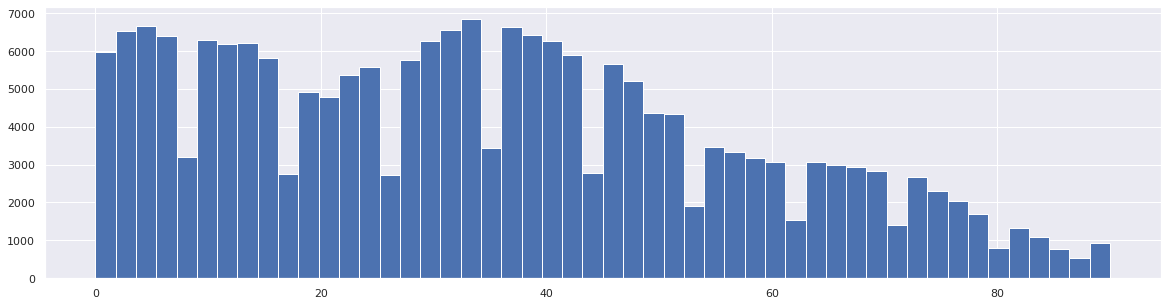

In [267]:
data_copy['age'].hist(figsize=(20,5),bins=50)

### 2. Wage Per Hour

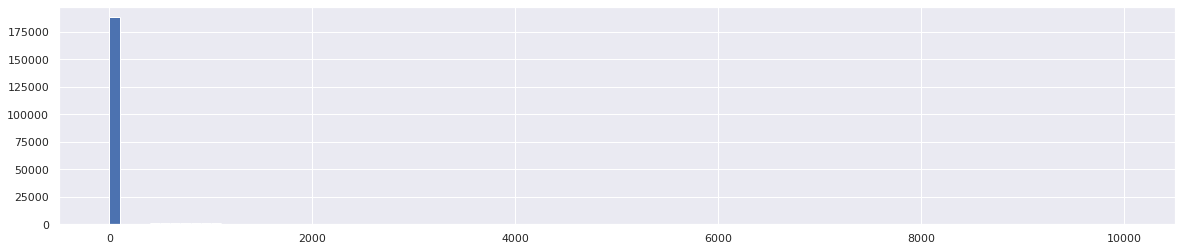

In [268]:
data_copy['wage_per_hour'].hist(figsize=(20,4),bins=100)

In [269]:
value_count_Cat('wage_per_hour')

0       188219
500        734
600        546
700        534
800        507
         ...  
1199         1
8600         1
1862         1
2299         1
1092         1
Name: wage_per_hour, Length: 1240, dtype: int64

In [270]:
# Replacing wage with mean
wage_col = data_copy['wage_per_hour']
wage_col.replace(to_replace = 0, value = wage_col.mean(), inplace=True)

In [271]:
value_count_Cat('wage_per_hour')

55.426908      188219
500.000000        734
600.000000        546
700.000000        534
800.000000        507
                ...  
1199.000000         1
8600.000000         1
1862.000000         1
2299.000000         1
1092.000000         1
Name: wage_per_hour, Length: 1240, dtype: int64

### 3. Capital gains

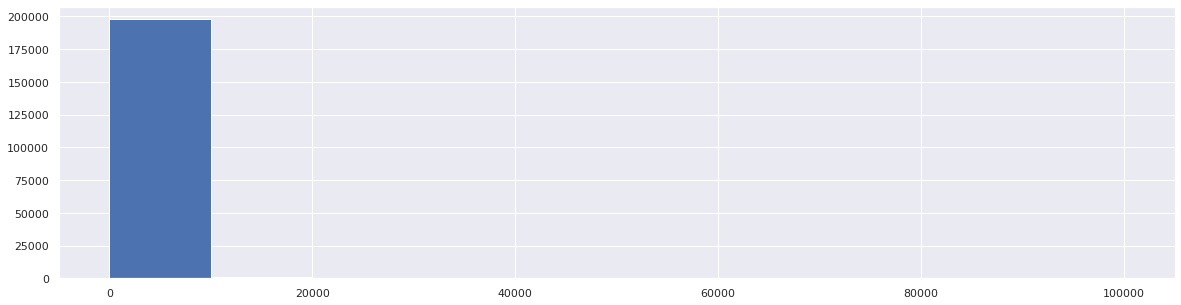

In [272]:
data_copy['capital_gains'].hist(figsize=(20,5),bins=10);

In [273]:
# Replacing gain with mean
gain_col = data_copy['capital_gains']
gain_col.replace(to_replace = 0, value = gain_col.mean(), inplace=True)

In [274]:
value_count_Cat('capital_gains')

434.71899      192144
15024.00000       788
7688.00000        609
7298.00000        582
99999.00000       390
                ...  
4594.00000          1
2601.00000          1
1140.00000          1
2227.00000          1
8530.00000          1
Name: capital_gains, Length: 132, dtype: int64

### 4. Capital Losses

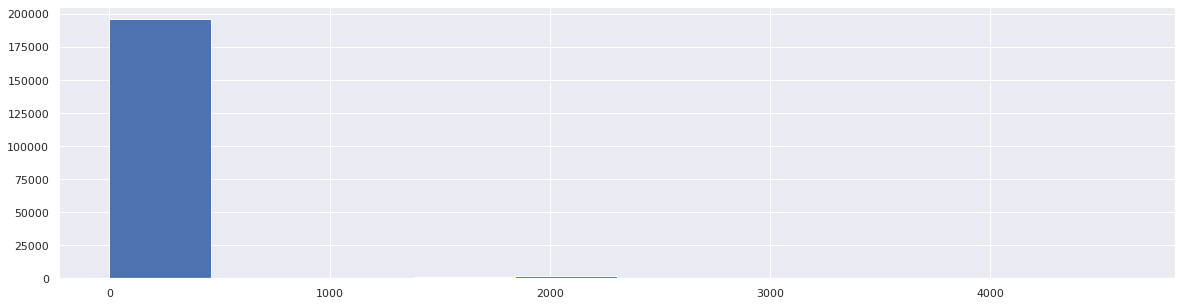

In [275]:
data_copy['capital_losses'].hist(figsize=(20,5),bins=10);

In [276]:
# Replacing loss with mean
loss_col = data_copy['capital_losses']
loss_col.replace(to_replace = 0, value = loss_col.mean(), inplace=True)

In [277]:
value_count_Cat('capital_losses')

37.313788      195617
1902.000000       407
1977.000000       381
1887.000000       364
1602.000000       193
                ...  
2201.000000         2
2519.000000         1
1911.000000         1
2080.000000         1
155.000000          1
Name: capital_losses, Length: 113, dtype: int64

### 5. Stock Dividend

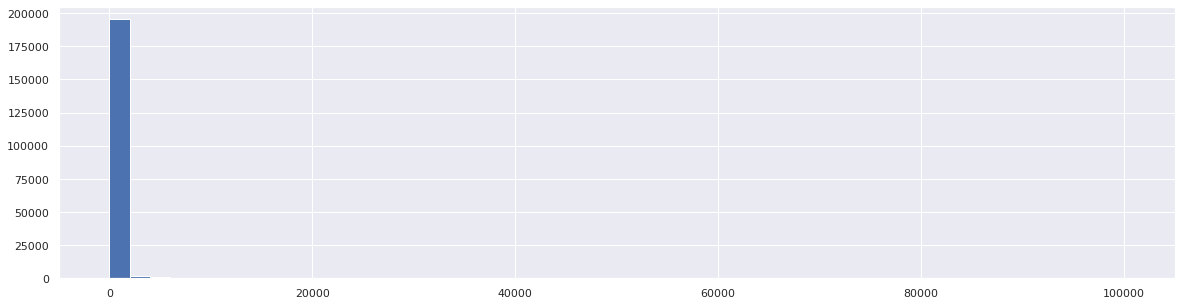

In [278]:
data_copy['stock_dividends'].hist(figsize=(20,5),bins=50)

In [279]:
# Replacing dividend with mean
divi_col = data_copy['stock_dividends']
divi_col.replace(to_replace = 0, value = divi_col.mean(), inplace=True)

In [280]:
value_count_Cat('stock_dividends')

197.529533      178382
100.000000        1148
500.000000        1030
1000.000000        894
200.000000         866
                 ...  
2746.000000          1
116.000000           1
12173.000000         1
3896.000000          1
7958.000000          1
Name: stock_dividends, Length: 1478, dtype: int64

### 6. instance weight

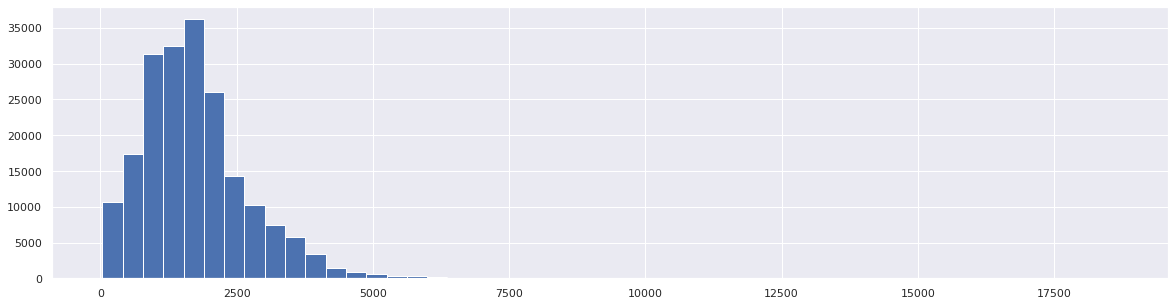

In [281]:
data_copy['instance weight'].hist(figsize=(20,5),bins=50)

### 7. Num_emp

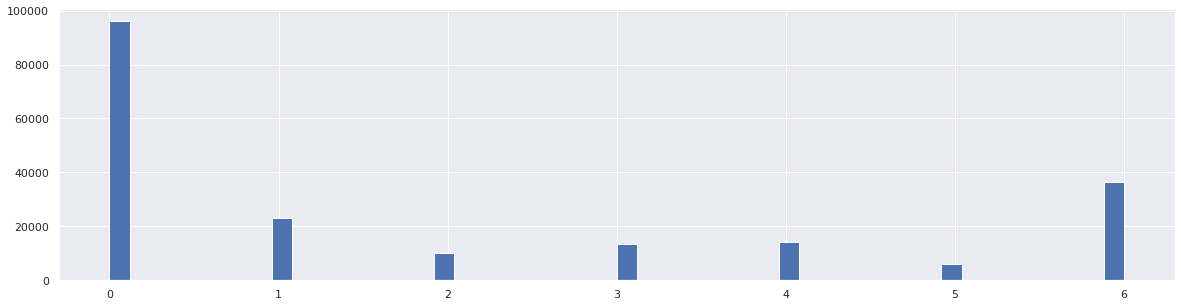

In [282]:
data_copy['num_emp'].hist(figsize=(20,5),bins=50);

### 8. Own or Self

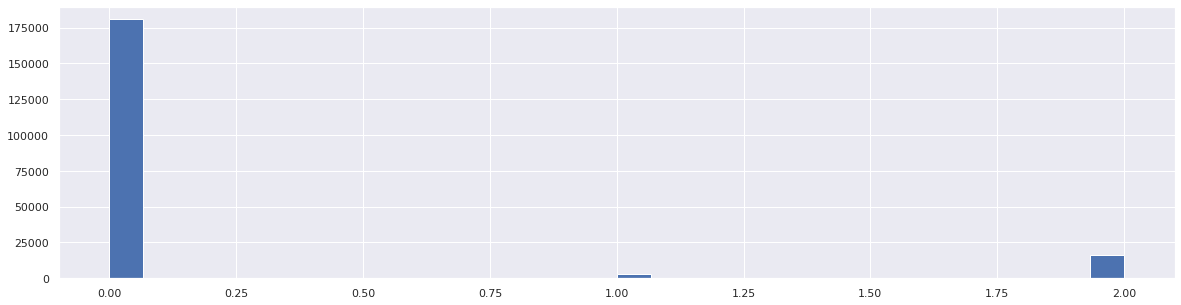

In [283]:
data_copy['own_or_self'].hist(figsize=(20,5),bins=30);

In [284]:
# Replacing with appropriate values 
data_copy["own_or_self"].replace({2 : 1}, inplace = True)

In [285]:
value_count_Cat('own_or_self')

0    180672
1     18851
Name: own_or_self, dtype: int64

#### 0 - Own business, 1 - Self-Business

### 9. Veterans Benifits - (vet_benefits)

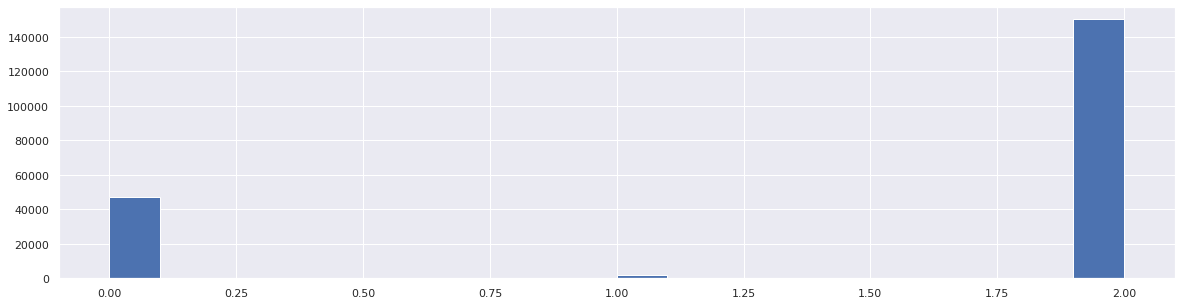

In [286]:
data_copy['vet_benefits'].hist(figsize=(20,5),bins= 20)

In [287]:
# Replacing with appropriate values 
data_copy["vet_benefits"].replace({2 : 1}, inplace = True)

In [288]:
value_count_Cat('vet_benefits')

1    152114
0     47409
Name: vet_benefits, dtype: int64

#### 1 - With Veterans benifits, 0 - No Veterans Benifits

### 10. Weeks Worked

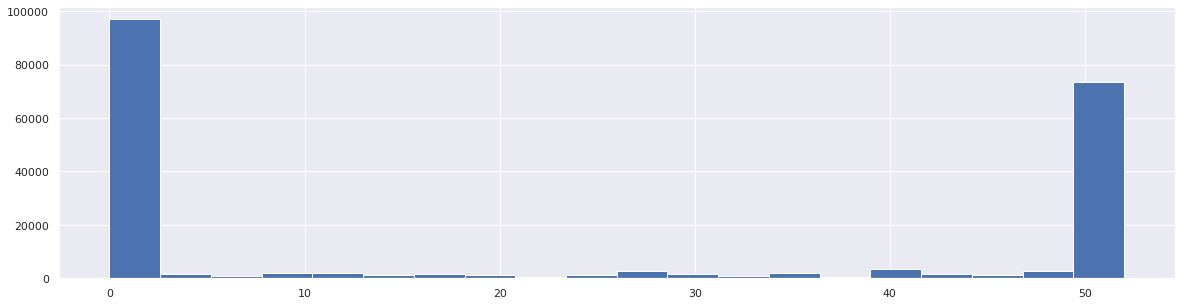

In [289]:
data_copy['weeks_worked'].hist(figsize=(20,5),bins= 20);

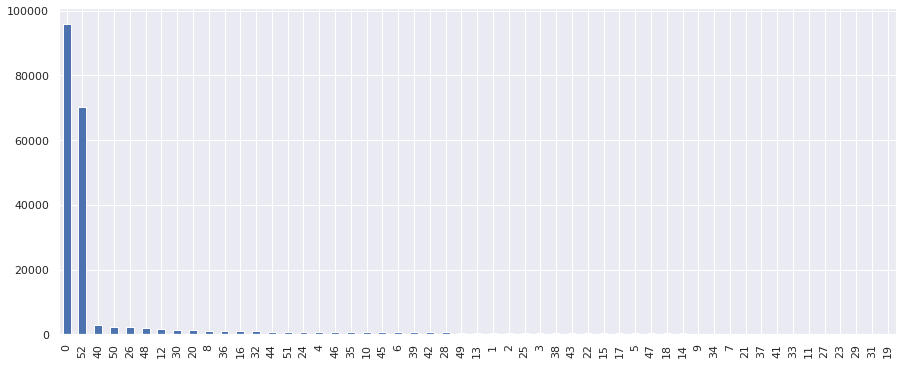

In [290]:
data_copy['weeks_worked'].value_counts().plot(kind= 'bar')

### 11. Year

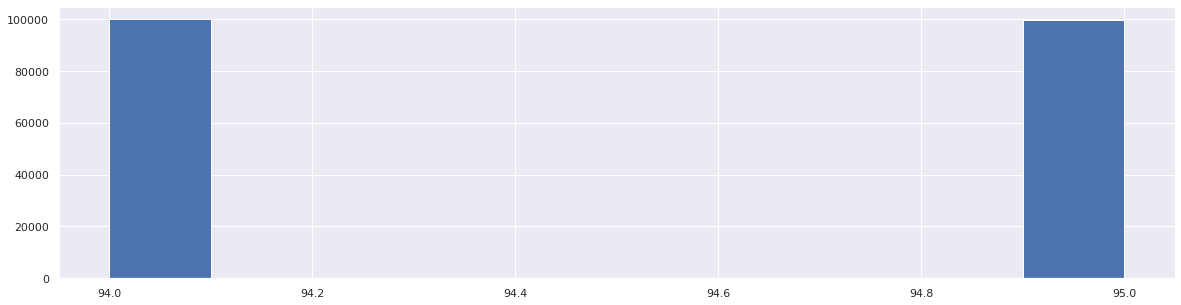

In [291]:
data_copy['year'].hist(figsize=(20,5),bins= 10)

In [292]:
# Only selecting numerical variables
numeric = data_copy.select_dtypes(include='number')
numeric

,age,wage_per_hour,capital_gains,capital_losses,stock_dividends,instance weight,num_emp,own_or_self,vet_benefits,weeks_worked,year
0,73,55.426908,434.71899,37.313788,197.529533,1700.09,0,0,1,0,95
1,58,55.426908,434.71899,37.313788,197.529533,1053.55,1,0,1,52,94
2,18,55.426908,434.71899,37.313788,197.529533,991.95,0,0,1,0,95
3,9,55.426908,434.71899,37.313788,197.529533,1758.14,0,0,0,0,94
4,10,55.426908,434.71899,37.313788,197.529533,1069.16,0,0,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...
199518,87,55.426908,434.71899,37.313788,197.529533,955.27,0,0,1,0,95
199519,65,55.426908,6418.00000,37.313788,9.000000,687.19,1,0,1,52,94
199520,47,55.426908,434.71899,37.313788,157.000000,1923.03,6,0,1,52,95
199521,16,55.426908,434.71899,37.313788,197.529533,4664.87,0,0,1,0,95


In [293]:
# data_copy.to_csv("cleaned_2.csv", index = False)

## 4. Encoding - (Handling Categorical Values)

#### Converting categorical values to numeric using `Label encoding` and `one-hot encoding`

In [294]:
data_encoded = data_copy.copy()

### A. Label encoding
1. Sex
2. Citizenship
3. Tax filer status
4. income_50k (Target Variable)
5. year - 1994, 1995

In [295]:
# Label Encoding

def label_encoding(col):
  # Creating an instance of label_encoder
  label_encoder = LabelEncoder()
  data_encoded[col] = label_encoder.fit_transform(data_encoded[col])
  return data_encoded[col].value_counts().plot(kind = 'bar')

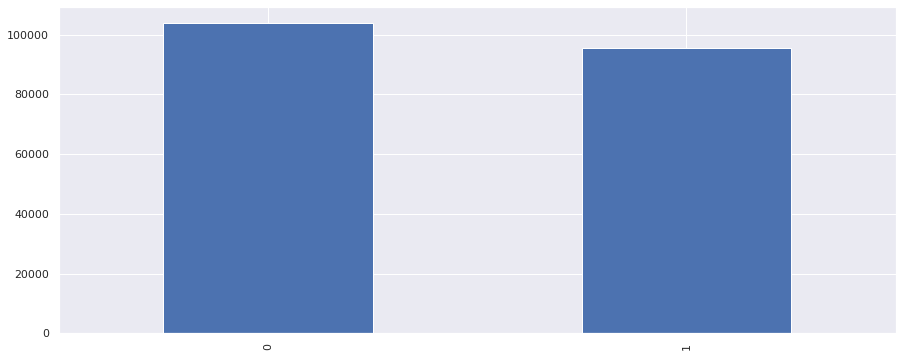

In [296]:
label_encoding('sex')

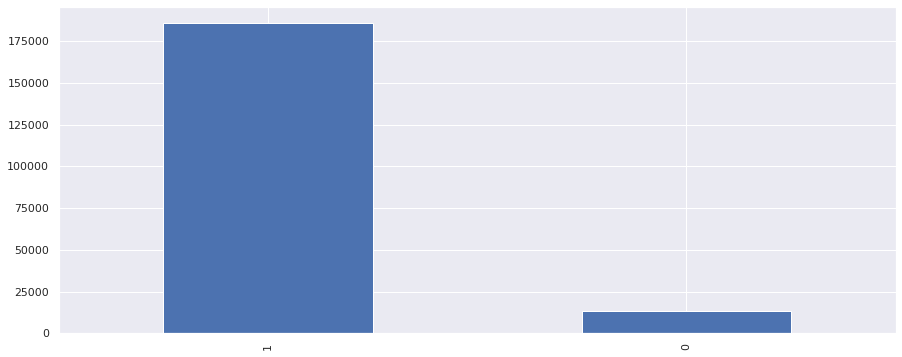

In [297]:
label_encoding('citizenship')

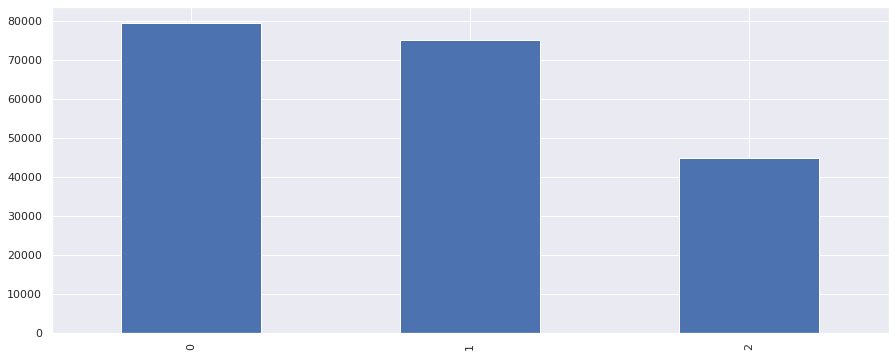

In [298]:
label_encoding('tax_filer_stat')

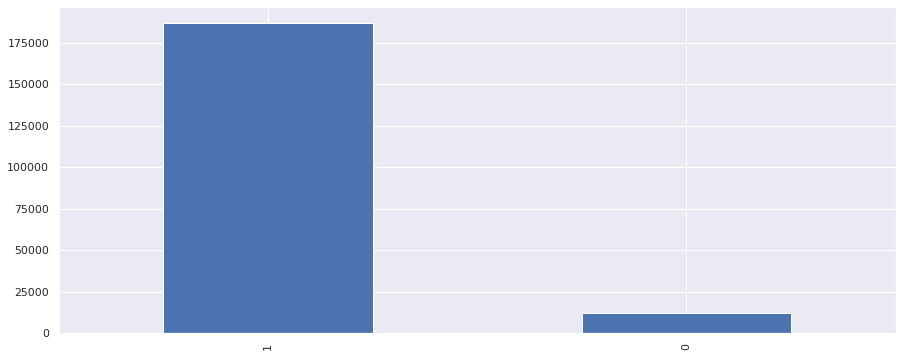

In [299]:
label_encoding('income_50k')

Here, 
1. "+50000" represents 0
2. "-50000" represents 1

0    99827
1    99696
Name: year, dtype: int64


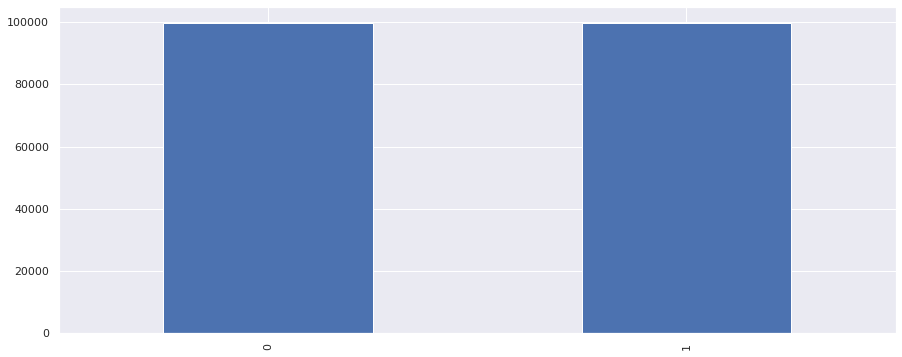

In [300]:
label_encoding('year')
print(data_encoded['year'].value_counts())

#### We can converted the year 1994 and 1995 to 1 and 0 as there is no point in normalizing them. 

Thus, 0 - 1994 and 1 - 1995. 

### B. Dummy Encoding
1. Education
2. Marital Status
3. Race
4. Hisp Origin
5. Full_or_part_emp
6. Detailed household summary in household (det_hh_summ)


Dropped ['wage_per_hour', 'capital_gains', 'capital_losses',
       'stock_dividends'] columns

In [301]:
# Encoding Education
edu = pd.get_dummies(data_encoded['education'], drop_first=True, prefix='Edu')
data_encoded = data_encoded.join(edu)
data_encoded = data_encoded.drop(columns = 'education')

In [302]:
# Encoding marital_status
martial = pd.get_dummies(data_encoded['marital_stat'], drop_first=True, prefix='Mari')
data_encoded = data_encoded.join(martial)
data_encoded = data_encoded.drop(columns = 'marital_stat')

In [303]:
# Encoding Race
race = pd.get_dummies(data_encoded['race'], drop_first=True, prefix='race')
data_encoded = data_encoded.join(race)
data_encoded = data_encoded.drop(columns = 'race')

In [304]:
# Encoding hisp_origin
Hisp = pd.get_dummies(data_encoded['hisp_origin'], drop_first=True, prefix='Hisp')
data_encoded = data_encoded.join(Hisp)
data_encoded = data_encoded.drop(columns = 'hisp_origin')

In [305]:
# Encoding full_or_part_emp
Empployement = pd.get_dummies(data_encoded['full_or_part_emp'], drop_first=True, prefix='Emp')
data_encoded = data_encoded.join(Empployement)
data_encoded = data_encoded.drop(columns = 'full_or_part_emp')

In [306]:
# Encoding Detailed household summary in household
household = pd.get_dummies(data_encoded['det_hh_summ'], drop_first=True, prefix='hh_sum')
data_encoded = data_encoded.join(household)
data_encoded = data_encoded.drop(columns = 'det_hh_summ')

In [307]:
# data_copy.to_csv("cleaned_4.csv", index = False)

#### Dropping 'wage_per_hour', 'capital_gains', 'capital_losses', 'stock_dividends'

In [308]:
data_encoded.drop(columns = ['wage_per_hour', 'capital_gains', 'capital_losses', 'stock_dividends'], axis = 1, inplace = True)
data_encoded.head(5)

,age,sex,tax_filer_stat,instance weight,num_emp,citizenship,own_or_self,vet_benefits,weeks_worked,year,...,Hisp_Spanish,Emp_Full-Time,Emp_Not in labor force,Emp_Part-Time,Emp_Unemployed,hh_sum_Householder,hh_sum_Non-relative of householder,hh_sum_Other relative of householder,hh_sum_Secondary individual,hh_sum_Spouse of householder
0,73,0,1,1700.09,0,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
1,58,1,2,1053.55,1,1,0,1,52,0,...,0,0,0,0,0,1,0,0,0,0
2,18,0,1,991.95,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,9,0,1,1758.14,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,0,1,1069.16,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5. Exploratory Data Analysis

In this module, we will Visualize the data and try to find some Hidden trends and patterns.

### 5.1 How many adults have income less than 50k and more than 50k?

In [309]:
data_encoded.income_50k.value_counts()

1    187141
0     12382
Name: income_50k, dtype: int64

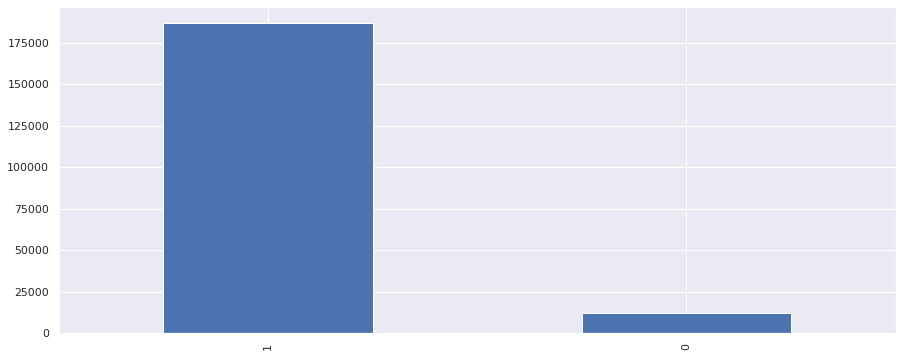

In [310]:
data_encoded.income_50k.value_counts().plot(kind = "bar")

### 5.2 What is the `Education status` of adults with income less than 50k?

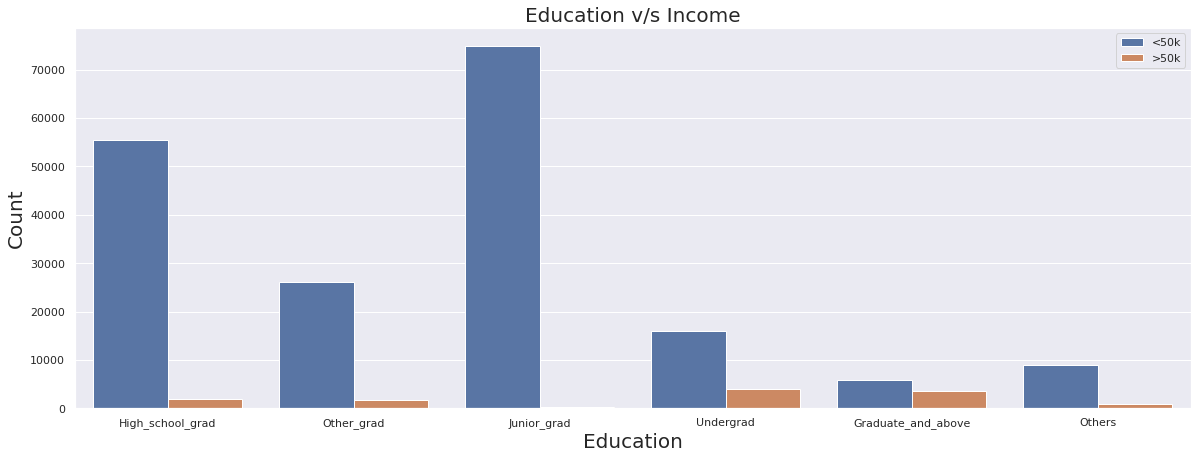

In [311]:
plt.figure(figsize = (20,7))
ax = sns.countplot(data=data_copy, x='education', hue='income_50k')
plt.xlabel("Education", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title('Education v/s Income',fontsize=20)
ax.legend(["<50k", ">50k"])
plt.show()

### 5.3 What is the `Marital Status` status of adults with income more than 50k?

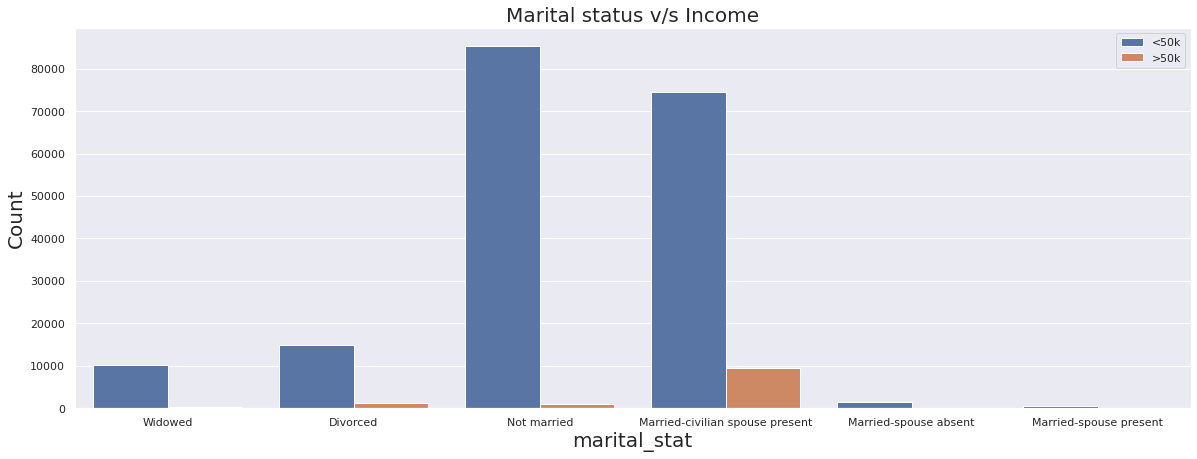

In [312]:
plt.figure(figsize = (20,7))
ax = sns.countplot(data=data_copy, x='marital_stat', hue='income_50k')
plt.xlabel("marital_stat", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title('Marital status v/s Income', fontsize=20)
ax.legend(["<50k",">50k"])
plt.show()

### 5.4 Correlation between the attributes

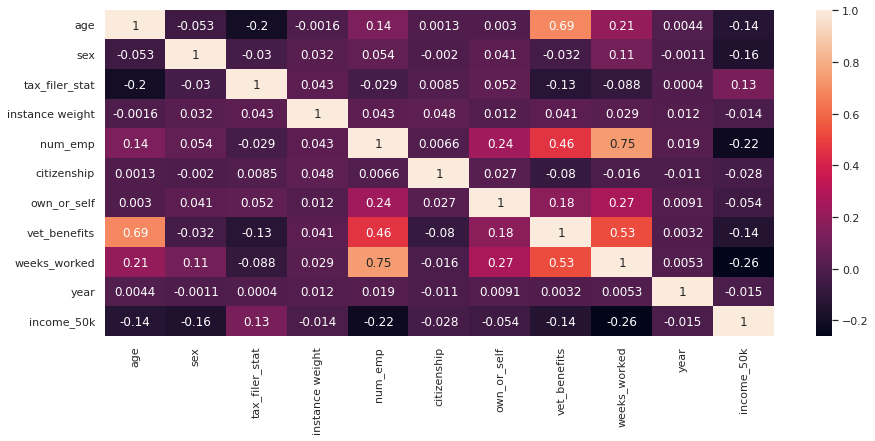

<Figure size 1440x1080 with 0 Axes>

In [313]:
data = data_encoded.iloc[:,:11].astype('int')
sns.heatmap(data.corr(), annot=True)
plt.figure(figsize=(20, 15))
plt.show()

From the heat map we can interpret that columns are highly correlated - 
1. (Age, vet_benefits) - 0.69
2. (num_emp, weeks_worked) - 0.75
3. (weeks_worked, vet_benefits) - 0.53

So, we are planning to remove `vet_benefits` and `weeks_worked` attributes


In [314]:
data_encoded.drop(columns = ['vet_benefits', 'weeks_worked'], axis = 1, inplace = True)

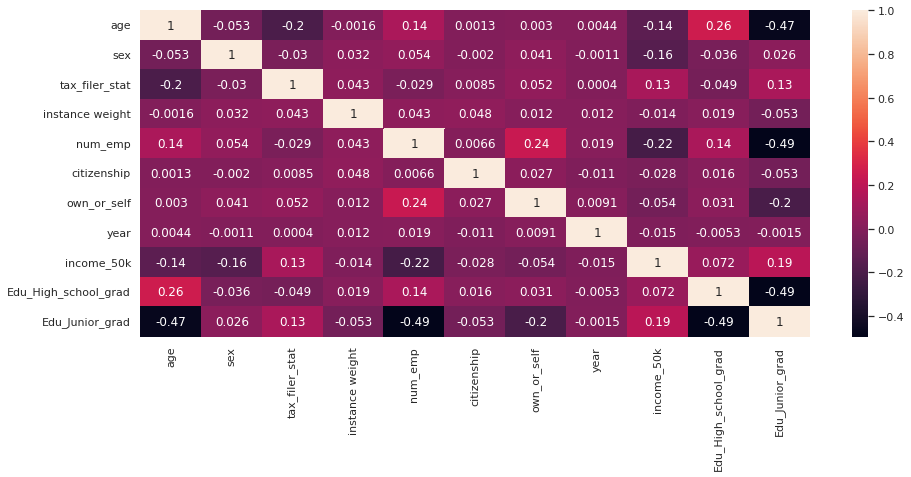

In [315]:
data=data_encoded.iloc[:,:11].astype('int')
sns.heatmap(data.corr(), annot=True)
sns.set(rc={'figure.figsize': (15,6)})

### 5.5 What is the `Race` of adults with income more than 50k?

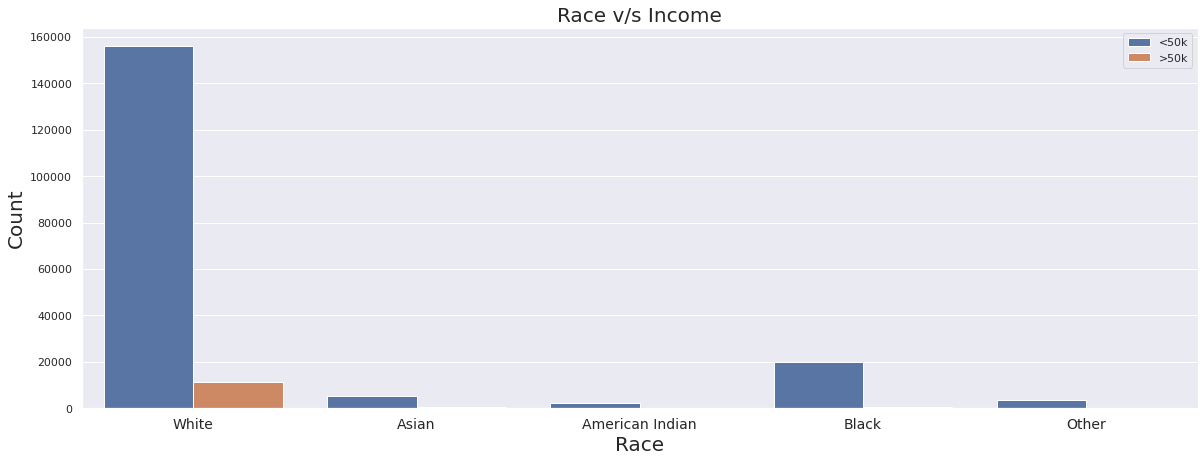

In [316]:
plt.figure(figsize = (20,7))
ax = sns.countplot(data=data_copy, x='race', hue='income_50k')
plt.xlabel("Race", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title('Race v/s Income', fontsize=20)
ax.set_xticklabels(["White","Asian","American Indian","Black", "Other"],fontsize=14)
ax.legend(["<50k",">50k"])
plt.show()

### 5.6 Total Number of weeks worked by the adults

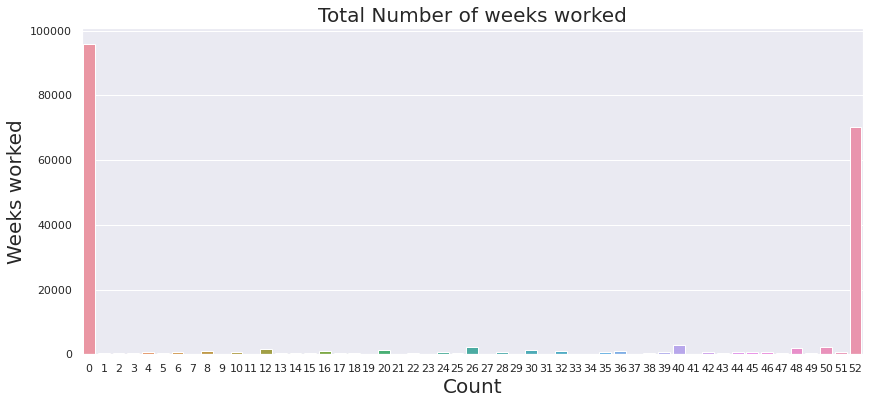

In [317]:
plt.figure(figsize = (14,6))
plt.title('Total Number of weeks worked',fontsize=20)
sns.countplot(data_copy['weeks_worked'])
plt.xlabel("Count",fontsize=20)
plt.ylabel("Weeks worked",fontsize=20)
plt.show()

### 5.7 What is the Citizenship of the adults?

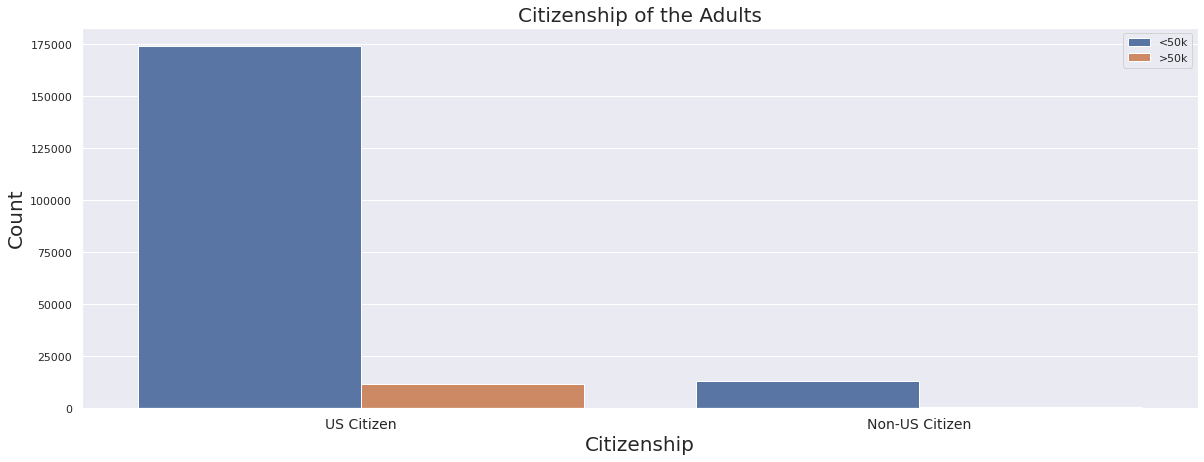

In [318]:
plt.figure(figsize = (20,7))
ax = sns.countplot(data=data_copy, x='citizenship', hue='income_50k')
plt.xlabel("Citizenship", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title('Citizenship of the Adults', fontsize=20)
ax.set_xticklabels(["US Citizen","Non-US Citizen"],fontsize=14)
ax.legend(["<50k",">50k"])
plt.show()

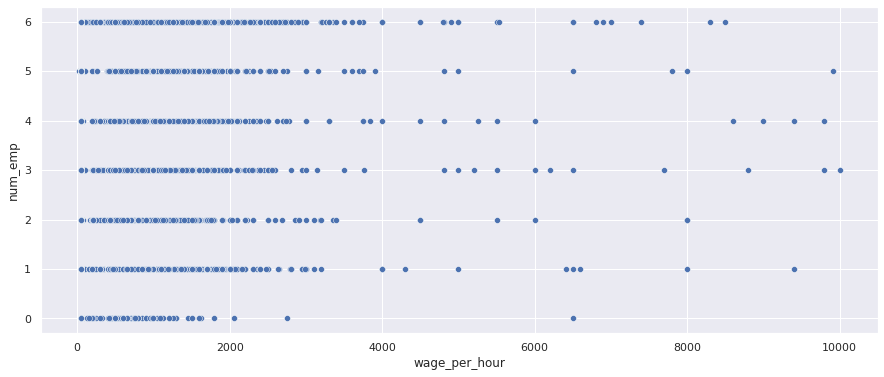

In [319]:
sns.scatterplot(data= data_copy, x='wage_per_hour', y='num_emp', 
                #hue = 'target'
                )

In [320]:
# Since data_encoded has all the encoded values for race and gender, we will be using "Data_copy" dataset
data_copy.groupby(['sex', 'race', 'income_50k']).mean()

age  wage_per_hour  capital_gains  \
sex    race            income_50k                                            
Female American Indian  50000+.    41.083333      55.426908    1650.492407   
                       -50000      28.617472     106.709936     485.543123   
       Asian            50000+.    41.963636     248.193308    3507.145664   
                       -50000      31.712458      94.469600     524.056456   
       Black            50000+.    45.241206     141.572078    4892.698062   
                       -50000      31.902134      98.210437     483.868062   
       Other            50000+.    40.058824      55.426908   12741.415639   
                       -50000      24.408262      84.082001     538.460570   
       White            50000+.    46.277419     119.541382    3367.754268   
                       -50000      36.265341     101.862053     544.453361   
Male   American Indian  50000+.    44.513514     209.840215    2467.393776   
                       -50000      25.846530     114.647644     567.340715   
       Asian            50000+.    43.290625     105.759985    6957.412589   
                       -50000      28.205749      98.788266     573.203261   
       Black            50000+.    45.278592     208.901724    3327.421206   
                       -50000      27.924270     109.840264     543.419047   
       Other            50000+.    42.135135     110.612304    4397.791586   
                       -50000      23.077556      80.678768     505.421615   
       White            50000+.    46.543199     135.274990    5694.322112   
                       -50000      32.673176     113.168897     614.294489   

                                   capital_losses  stock_dividends  \
sex    race            income_50k                                    
Female American Indian  50000+.         37.313788      2040.225561   
                       -50000           45.402098       263.177433   
       Asian            50000+.        149.760309       990.160508   
                       -50000           50.878929       266.189695   
       Black            50000+.        185.363641      1072.123644   
                       -50000           50.756455       208.046952   
       Other            50000+.        287.688637      2758.287290   
                       -50000           53.453462       207.229006   
       White            50000+.        163.121906      2555.511566   
                       -50000           54.984350       317.024662   
Male   American Indian  50000+.         78.575578      2512.426158   
                       -50000           61.132257       296.065204   
       Asian            50000+.        253.732593      1214.310000   
                       -50000           70.135763       273.691575   
       Black            50000+.        233.558161       595.795845   
                       -50000           62.059650       208.404906   
       Other            50000+.        240.500322      2248.006441   
                       -50000           71.679804       201.526904   
       White            50000+.        244.814298      1502.767325   
                       -50000           77.019612       283.544075   

                                   instance weight   num_emp  own_or_self  \
sex    race            income_50k                                           
Female American Indian  50000+.        1237.467500  4.916667     0.166667   
                       -50000           878.314148  1.683630     0.095844   
       Asian            50000+.        1474.526455  4.527273     0.181818   
                       -50000          1512.384380  1.663636     0.055892   
       Black            50000+.        1914.295226  4.788945     0.190955   
                       -50000          2099.958029  1.821824     0.053300   
       Other            50000+.        1211.004118  4.470588     0.352941   
                       -50000          1020.568552  1.485515     0.053648   
       White 

In [321]:
#import seaborn as sns
#sns.pairplot(data_encoded.iloc[:,0:9], hue = 'income_50k')

## 6. Machine Learning

#### In this module, we will implement machine learning models

1. We will normalize the dataset using `Min-max scaling`.

2. Since our Target variable (Income_50k) is "imbalanced", we will be using `Sampling methods` to upscale the data - 
* Undersampling Method,
* Oversampling Method,
* SMOTE Method

3. We will implement `Principal Component Analysis` (PCA) to check which attributes have most of the information

4. Then, we will implement Machine Learning algorithms on this dataset - 

* Logistic Regression
* SVM
* Naive Bayes


### A. Normalizing the dataset (`data_encoded`)

To normalize our dataset we will be using Min-Max scaling()

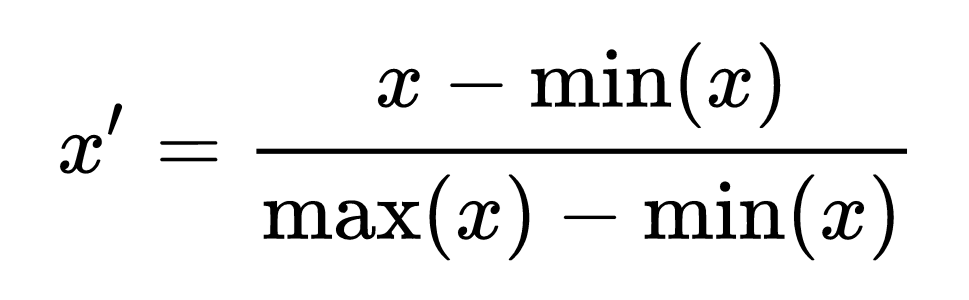

In [322]:
# data normalization
data_encoded_1 = data_encoded.copy()

for column in data_encoded_1.columns:
    data_encoded_1[column] = (data_encoded_1[column] - data_encoded_1[column].min()) / (data_encoded_1[column].max() - data_encoded_1[column].min())    
  
# viewing normalized data
display(data_encoded_1.head(5)) 

,age,sex,tax_filer_stat,instance weight,num_emp,citizenship,own_or_self,year,income_50k,Edu_High_school_grad,...,Hisp_Spanish,Emp_Full-Time,Emp_Not in labor force,Emp_Part-Time,Emp_Unemployed,hh_sum_Householder,hh_sum_Non-relative of householder,hh_sum_Other relative of householder,hh_sum_Secondary individual,hh_sum_Spouse of householder
0,0.811111,0.0,0.5,0.089278,0.000000,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.644444,1.0,1.0,0.054552,0.166667,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.200000,0.0,0.5,0.051244,0.000000,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.100000,0.0,0.5,0.092396,0.000000,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.111111,0.0,0.5,0.055391,0.000000,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### B. Sampling the Target Variable - (Oversampling, Undersampling and SMOTE)

Since our target variable is imbalanced, we are going to implement 3 sampling techniques - 
1. Undersampling 
2. Oversmapling
3. SMOTE

In [323]:
# Segregating Predictor and Target variable
X1 = data_encoded_1.copy()
X1.drop('income_50k', axis = 1, inplace = True)
y1 = data_encoded_1['income_50k']

In [324]:
# Undersampling
def undersampled(X1, y1):
  rus = RandomUnderSampler(random_state=21)
  X_Usampled, y_Usampled = rus.fit_resample(X1, y1)
  return pd.Series(y_Usampled).value_counts()

In [325]:
undersampled(X1, y1)


0.0    12382
1.0    12382
Name: income_50k, dtype: int64

In [326]:
# Oversampling
def oversampled(X1, y1):
  ros = RandomOverSampler(random_state=21)
  X_Osampled, y_Osampled = ros.fit_resample(X1, y1)
  return pd.Series(y_Osampled).value_counts()

In [327]:
oversampled(X1, y1)

1.0    187141
0.0    187141
Name: income_50k, dtype: int64

In [328]:
# SMOTE
def smote(X1, y1):
  sm = SMOTE(random_state=21)
  X_SMOTE, y_SMOTE = sm.fit_resample(X1, y1)
  return pd.Series(y_SMOTE).value_counts()

In [329]:
smote(X1, y1)

1.0    187141
0.0    187141
Name: income_50k, dtype: int64

### Applying PCA

In this module, we will implement PCA for Original dataset i.e., `data_encoded`

First we will Standardize the dataset using `Standard Scalar`

In [330]:
# Spliting the dataset
X, y = data_encoded.iloc[:, :-1], data_encoded.iloc[:, -1]

In [331]:
def Standardize(data):
  scaler = StandardScaler()
  scaler.fit(data)
  X_pca = scaler.transform(data)
  return X_pca

In [332]:
Standardize(data_encoded)

array([[ 1.72587866, -0.95853304,  0.22601019, ...,  4.42301048,
        -0.02572967, -0.51409351],
       [ 1.05355971,  1.04326086,  1.52424632, ..., -0.22609035,
        -0.02572967, -0.51409351],
       [-0.73929082, -0.95853304,  0.22601019, ..., -0.22609035,
        -0.02572967, -0.51409351],
       ...,
       [ 0.56052581,  1.04326086, -1.07222593, ..., -0.22609035,
        -0.02572967, -0.51409351],
       [-0.82893335, -0.95853304,  0.22601019, ..., -0.22609035,
        -0.02572967, -0.51409351],
       [-0.11179313, -0.95853304,  1.52424632, ..., -0.22609035,
        -0.02572967, -0.51409351]])

In [333]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        
    def fit(self,X):
        self.mean = np.mean(X,axis=0)
        X = X - self.mean
        cov = np.cov(X.T)
        # Calculate Eigan Values and Eigan vectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        indexs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[indexs]
        eigenvectors = eigenvectors[indexs]
        top_comp = eigenvalues[0:self.n_components]
        print("The Variance Captured by", self.n_components, "components:", round(top_comp.sum()/eigenvalues.sum(),2)*100, "%",'\n')
        self.components = eigenvectors[0:self.n_components]
        
    def transform(self,X):
        X = X - self.mean
        print(np.dot(X,self.components.T))
        return np.dot(X,self.components.T)  

In [334]:
pca = PCA(n_components=30)
pca.fit(Standardize(data_encoded))
x_pca = pca.transform(Standardize(data_encoded))

The Variance Captured by 30 components: 98.0 % 

[[ 0.31746656  0.46386081 -1.03460624 ... -0.49046159 -0.51065644
  -0.11074792]
 [ 0.32156267  1.43996874  0.73699495 ...  0.12912072 -0.38480441
   0.80019599]
 [-2.57953192 -1.04018752 -0.27100449 ...  0.81969715  0.40822438
  -0.68658477]
 ...
 [ 2.2555258   0.65091512  0.71576594 ... -0.06192271  0.21267443
  -1.03444674]
 [-2.09128702  0.38233745 -1.69710201 ...  0.10952144  0.74322334
  -0.78520585]
 [-0.9718947   1.42479161  1.4349464  ...  3.52664584  0.14037142
  -0.64545098]]


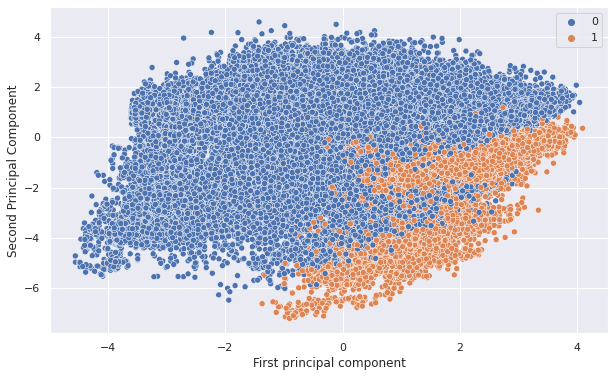

In [335]:
plt.figure(figsize=(10,6))
sns.scatterplot(x= x_pca[:,0], y = x_pca[:,1], hue=y)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.legend()

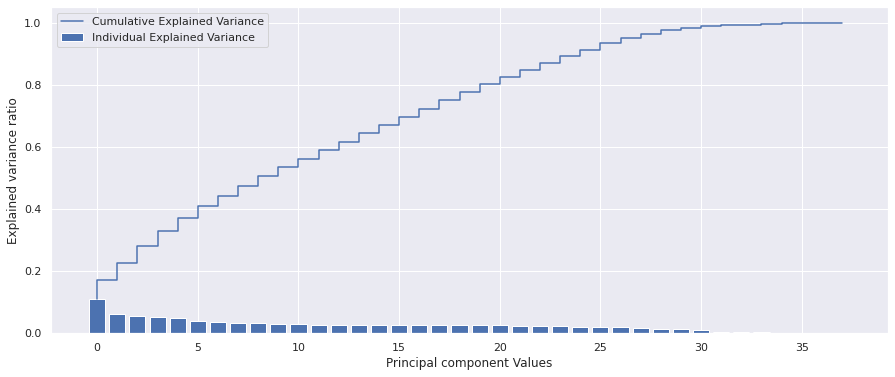

In [336]:
from numpy.linalg import eigh

cova_matrix = np.cov(Standardize(data_encoded), rowvar=False)

eignvalues, egnvectors = eigh(cova_matrix)

total_eignvalues = sum(eignvalues)
indiv_var_exp = [(i/total_eignvalues) for i in sorted(eignvalues, reverse=True)]

cumu_exp_var = np.cumsum(indiv_var_exp)

plt.bar(range(0,len(indiv_var_exp)), indiv_var_exp, label='Individual Explained Variance')
plt.step(range(0,len(cumu_exp_var)), cumu_exp_var, label='Cumulative Explained Variance')
plt.xlabel('Principal component Values')
plt.ylabel('Explained variance ratio')
plt.legend()
plt.show()

### 1. Logistic Regression

We will implement Logistic regression for Original and sampled dataset and calculate the Error accordingly.

Cost Fuction - Negative Log Likelihood

#### 1.1 Original Dataset

In [339]:
class LogisticRegression:
    def __init__(self, learningRate, tolerance, maxIteration = 1000, indexes=[]):
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.indexes = indexes
        
    def datasetReader(self, indexes):
      X1 = data_encoded_1.copy()
      X1.drop('income_50k', axis = 1, inplace = True)
      y1 = data_encoded['income_50k']
      X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, stratify=y1, random_state=21)
      return X_train, y_train, X_test, y_test
    
    # Adding a new column with "1" for weight
    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
    
    # Calculating the sigmoid function
    def sigmoid(self, z_value):
        sig_value = 1/(1 + np.exp(-z_value))
        return sig_value

    # Calculating the cost function
    def costFunction(self, X, y):
        # Calculating Negative log likelihood
        pred_value_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w)*y
        cost_value = pred_value_.sum()
        return cost_value
    
    # calculating the gradient term
    def gradient(self, X, y):
        sig_value = self.sigmoid(X.dot(self.w))
        gradient_value = (sig_value - y).dot(X)
        return gradient_value
    
    # Calculating gradient Descent
    def gradientDescent(self, X, y):
        cost_sequences = []
        last_cost = float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            cur_cost = self.costFunction(X, y)

            diff = last_cost - cur_cost
            last_cost = cur_cost
            cost_sequences.append(cur_cost)
            if diff < self.tolerance:
                print('The model Converged')
                break
                
        self.plotCost(cost_sequences)
        return 
    
    def plotCost(self, error_sequences):
        s = np.array(error_sequences)
        t = np.arange(s.size)
        fig, ax = plt.subplots()
        ax.plot(t, s)
        ax.set(xlabel='Iteration', ylabel='Error')
        
    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100)

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.ylabel('$x_2$ feature', fontsize=15)
        plt.xlabel('$x_1$ feature', fontsize=15)
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)   
    
    def scatterPlt(self):
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))

        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)

        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        
    def plot3D(self):
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()
    
    def predict(self, X):
        sigmoid_value = self.sigmoid(X.dot(self.w))
        return np.around(sigmoid_value)
    
    # Evaluating the model
    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)
        accuracy = (y == y_hat).sum()/y.size
        precision = (y & y_hat).sum()/y_hat.sum()
        recall = (y & y_hat).sum()/y.sum()
        return accuracy, precision, recall
    
    def runModel(self):
        self.X_train, self.y_train, self.X_test, self.y_test = self.datasetReader(self.indexes)
        print('Solving Logistic regression using Gradient Descent')
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
        self.gradientDescent(self.X_train, self.y_train)
        y_hat_train = self.predict(self.X_train)
        accuracy, precision, recall = self.evaluate(self.y_train, y_hat_train)

        print('\nAccuracy :', round(accuracy,3)*100)
        print('Precision :', round(precision,3))
        print('Recall :', round(recall,3))

Solving Logistic regression using Gradient Descent


100%|██████████| 10000/10000 [08:04<00:00, 20.65it/s]



Accuracy : 94.19999999999999
Precision : 0.95
Recall : 0.991
Time:  484.608305967


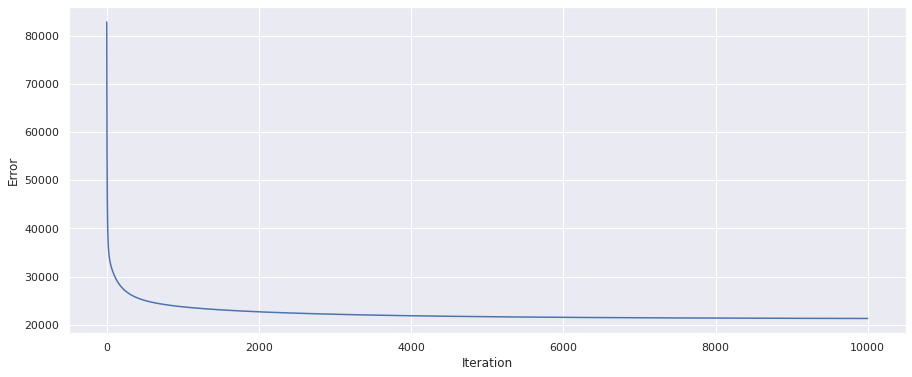

In [340]:
# Creating an instance
import timeit
start = timeit.default_timer()
lr = LogisticRegression(tolerance=0.0, learningRate=0.1e-5, maxIteration=10000)
lr.runModel()
stop = timeit.default_timer()
print('Time: ', round((stop - start),2), 'seconds')

#### 1.2 Undersampled Dataset

In [341]:
class LogisticRegression:
    def __init__(self, learningRate, tolerance, maxIteration = 1000, indexes=[]):
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.indexes = indexes
        
    def datasetReader(self, indexes):
      X2 = data_encoded_1.copy()
      X2.drop('income_50k', axis = 1, inplace = True)
      y2 = data_encoded_1['income_50k']
      rus = RandomUnderSampler(random_state=21)
      X_Usampled, y_Usampled = rus.fit_resample(X2, y2)

      X_train, X_test, y_train, y_test = train_test_split(X_Usampled, y_Usampled, test_size=0.3, stratify=y_Usampled, random_state=42) #test_size=0.2, 0.3
      return X_train, y_train, X_test, y_test
    
    # Adding a new column with "1" for weight
    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
    
    # Calculating the sigmoid function
    def sigmoid(self, z_value):
        sig_value = 1/(1 + np.exp(-z_value))
        return sig_value

    # Calculating the cost function
    def costFunction(self, X, y):
        # Calculating Negative log likelihood
        pred_value_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w)*y
        cost_value = pred_value_.sum()
        return cost_value
    
    # calculating the gradient term
    def gradient(self, X, y):
        sig_value = self.sigmoid(X.dot(self.w))
        gradient_value = (sig_value - y).dot(X)
        return gradient_value
    
    # Calculating gradient Descent
    def gradientDescent(self, X, y):
        cost_sequences = []
        last_cost = float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            cur_cost = self.costFunction(X, y)

            diff = last_cost - cur_cost
            last_cost = cur_cost
            cost_sequences.append(cur_cost)
            if abs(diff) < self.tolerance:
                print('The model Converged')
                break
                
        self.plotCost(cost_sequences)
        return 
    
    def plotCost(self, error_sequences):
        s = np.array(error_sequences)
        t = np.arange(s.size)
        fig, ax = plt.subplots()
        ax.plot(t, s)
        ax.set(xlabel='Iteration', ylabel='Error')
        
    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100)

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.ylabel('$x_2$ feature', fontsize=15)
        plt.xlabel('$x_1$ feature', fontsize=15)
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)   
    
    def scatterPlt(self):
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))

        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)

        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        
    def plot3D(self):
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()
    
    def predict(self, X):
        sigmoid_value = self.sigmoid(X.dot(self.w))
        return np.around(sigmoid_value)
    
    # Evaluating the model
    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)
        accuracy = (y == y_hat).sum()/y.size
        precision = (y & y_hat).sum()/y_hat.sum()
        recall = (y & y_hat).sum()/y.sum()
        return accuracy, precision, recall
    
    def runModel(self):
        self.X_train, self.y_train, self.X_test, self.y_test = self.datasetReader(self.indexes)
        print('Solving Logistic regression using Gradient Descent')
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
        self.gradientDescent(self.X_train, self.y_train)
        y_hat_train = self.predict(self.X_train)
        accuracy, precision, recall = self.evaluate(self.y_train, y_hat_train)

        print('\nAccuracy :', round(accuracy,3)*100)
        print('Precision :', round(precision,3))
        print('Recall :', round(recall,3))

Solving Logistic regression using Gradient Descent


100%|██████████| 10000/10000 [01:42<00:00, 97.50it/s]



Accuracy : 82.5
Precision : 0.856
Recall : 0.782
Time:  102.95 seconds


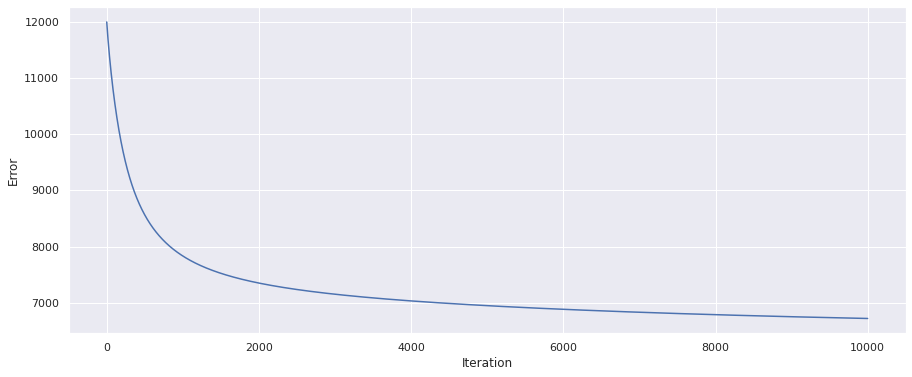

In [343]:
# Creating an instance
import timeit
start = timeit.default_timer()
lr1 = LogisticRegression(tolerance=0.0, learningRate=0.1e-5, maxIteration=10000)
lr1.runModel()
stop = timeit.default_timer()
print('Time: ', round((stop - start),2), 'seconds')

#### 1.3 Oversampled Data

In [344]:
class LogisticRegression:
    def __init__(self, learningRate, tolerance, maxIteration = 1000, indexes=[]):
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.indexes = indexes
        
    def datasetReader(self, indexes):
      X3 = data_encoded_1.copy()
      X3.drop('income_50k', axis = 1, inplace = True)
      y3 = data_encoded_1['income_50k']
      ros = RandomOverSampler(random_state=21)
      X_Osampled, y_Osampled = ros.fit_resample(X3, y3)

      X_train, X_test, y_train, y_test = train_test_split(X_Osampled, y_Osampled, test_size=0.3, stratify=y_Osampled, random_state=21)
      return X_train, y_train, X_test, y_test
    
    # Adding a new column with "1" for weight
    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
    
    # Calculating the sigmoid function
    def sigmoid(self, z_value):
        sig_value = 1/(1 + np.exp(-z_value))
        return sig_value

    # Calculating the cost function
    def costFunction(self, X, y):
        # Calculating Negative log likelihood
        pred_value_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w)*y
        cost_value = pred_value_.sum()
        return cost_value
    
    # calculating the gradient term
    def gradient(self, X, y):
        sig_value = self.sigmoid(X.dot(self.w))
        gradient_value = (sig_value - y).dot(X)
        return gradient_value
    
    # Calculating gradient Descent
    def gradientDescent(self, X, y):
        cost_sequences = []
        last_cost = float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            cur_cost = self.costFunction(X, y)

            diff = last_cost - cur_cost
            last_cost = cur_cost
            cost_sequences.append(cur_cost)
            if abs(diff) < self.tolerance:
                print('The model Converged')
                break
                
        self.plotCost(cost_sequences)
        return 
    
    def plotCost(self, error_sequences):
        s = np.array(error_sequences)
        t = np.arange(s.size)
        fig, ax = plt.subplots()
        ax.plot(t, s)
        ax.set(xlabel='Iteration', ylabel='Error')
        
    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100)

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.ylabel('$x_2$ feature', fontsize=15)
        plt.xlabel('$x_1$ feature', fontsize=15)
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)   
    
    def scatterPlt(self):
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))

        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)

        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        
    def plot3D(self):
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()
    
    def predict(self, X):
        sigmoid_value = self.sigmoid(X.dot(self.w))
        return np.around(sigmoid_value)
    
    # Evaluating the model
    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)
        accuracy = (y == y_hat).sum()/y.size
        precision = (y & y_hat).sum()/y_hat.sum()
        recall = (y & y_hat).sum()/y.sum()
        return accuracy, precision, recall
    
    def runModel(self):
        self.X_train, self.y_train, self.X_test, self.y_test = self.datasetReader(self.indexes)
        print('Solving Logistic regression using Gradient Descent')
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
        self.gradientDescent(self.X_train, self.y_train)
        y_hat_train = self.predict(self.X_train)
        accuracy, precision, recall = self.evaluate(self.y_train, y_hat_train)

        print('\nAccuracy :', round(accuracy,3)*100)
        print('Precision :', round(precision,3))
        print('Recall :', round(recall,3))

Solving Logistic regression using Gradient Descent


100%|██████████| 10000/10000 [13:42<00:00, 12.15it/s]



Accuracy : 83.2
Precision : 0.855
Recall : 0.799
Time:  824.18 seconds


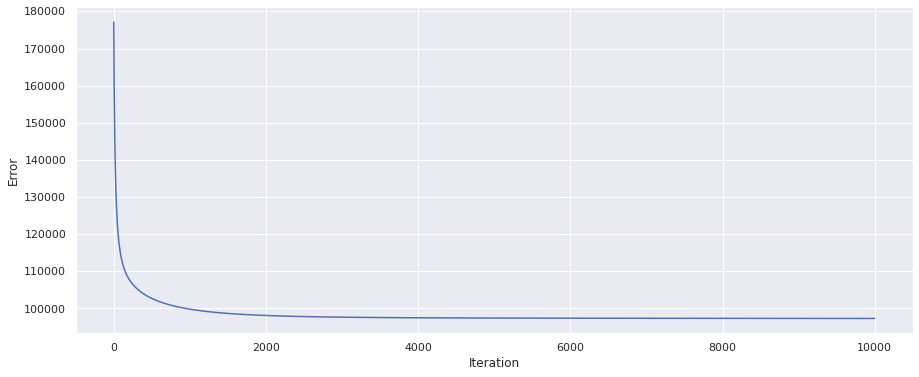

In [345]:
# Creating an Instance
import timeit
start = timeit.default_timer()
lr2 = LogisticRegression(tolerance=0.0, learningRate=0.1e-5, maxIteration=10000)
lr2.runModel()
stop = timeit.default_timer()
print('Time: ', round((stop - start),2), 'seconds')

#### 1.4 SMOTE Dataset

In [350]:
class LogisticRegression:
    def __init__(self, learningRate, tolerance, maxIteration = 1000, indexes=[]):
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.indexes = indexes
        
    def datasetReader(self, indexes):
      X4 = data_encoded_1.copy()
      X4.drop('income_50k', axis = 1, inplace = True)
      y4 = data_encoded_1['income_50k']
      sm = SMOTE(random_state=21)
      X_SMOTE, y_SMOTE = sm.fit_resample(X4, y4)

      X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.3, stratify=y_SMOTE, random_state=42)
      return X_train, y_train, X_test, y_test
    
    # Adding a new column with "1" for weight
    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
    
    # Calculating the sigmoid function
    def sigmoid(self, z_value):
        sig_value = 1/(1 + np.exp(-z_value))
        return sig_value

    # Calculating the cost function
    def costFunction(self, X, y):
        # Calculating Negative log likelihood
        pred_value_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w)*y
        cost_value = pred_value_.sum()
        return cost_value
    
    # calculating the gradient term
    def gradient(self, X, y):
        sig_value = self.sigmoid(X.dot(self.w))
        gradient_value = (sig_value - y).dot(X)
        return gradient_value
    
    # Calculating gradient Descent
    def gradientDescent(self, X, y):
        cost_sequences = []
        last_cost = float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            cur_cost = self.costFunction(X, y)
            # Printing the cost after every iteration
            if i % 1000 == 0:
              print(cur_cost)

            diff = last_cost - cur_cost
            last_cost = cur_cost
            cost_sequences.append(cur_cost)
            if abs(diff) < self.tolerance:
              print('The model Converged')
              break
                
        self.plotCost(cost_sequences)
        return 
    
    def plotCost(self, error_sequences):
        s = np.array(error_sequences)
        t = np.arange(s.size)
        fig, ax = plt.subplots()
        ax.plot(t, s)
        ax.set(xlabel='Iteration', ylabel='Error')
        
    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100)

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.ylabel('$x_2$ feature', fontsize=15)
        plt.xlabel('$x_1$ feature', fontsize=15)
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)   
    
    def scatterPlt(self):
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))

        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)

        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        
    def plot3D(self):
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()
    
    def predict(self, X):
        sigmoid_value = self.sigmoid(X.dot(self.w))
        return np.around(sigmoid_value)
    
    # Evaluating the model
    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)
        accuracy = (y == y_hat).sum()/y.size
        precision = (y & y_hat).sum()/y_hat.sum()
        recall = (y & y_hat).sum()/y.sum()
        return accuracy, precision, recall
    
    def runModel(self):
        self.X_train, self.y_train, self.X_test, self.y_test = self.datasetReader(self.indexes)
        print('Solving Logistic regression using Gradient Descent')
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
        self.gradientDescent(self.X_train, self.y_train)
        y_hat_train = self.predict(self.X_train)
        accuracy, precision, recall = self.evaluate(self.y_train, y_hat_train)

        print('\nAccuracy :', round(accuracy,3)*100)
        print('Precision :', round(precision,3))
        print('Recall :', round(recall,3))

Solving Logistic regression using Gradient Descent


  0%|          | 2/10000 [00:00<10:40, 15.62it/s]

177141.66278008692


 10%|█         | 1003/10000 [01:15<11:06, 13.50it/s]

98110.61941289448


 20%|██        | 2002/10000 [02:31<09:53, 13.48it/s]

96144.42464317448


 30%|███       | 3003/10000 [03:51<08:34, 13.59it/s]

95586.09973286201


 40%|████      | 4003/10000 [05:16<09:33, 10.46it/s]

95374.3151578054


 50%|█████     | 5002/10000 [06:55<07:40, 10.84it/s]

95274.11814798924


 60%|██████    | 6003/10000 [08:30<05:59, 11.12it/s]

95216.72134334779


 70%|███████   | 7003/10000 [10:03<04:09, 12.01it/s]

95178.54309924495


 80%|████████  | 8003/10000 [11:28<02:39, 12.54it/s]

95150.45828082341


 90%|█████████ | 9003/10000 [12:47<01:14, 13.38it/s]

95128.4910765284


100%|██████████| 10000/10000 [14:03<00:00, 11.85it/s]



Accuracy : 83.7
Precision : 0.861
Recall : 0.803
Time:  848.04 seconds


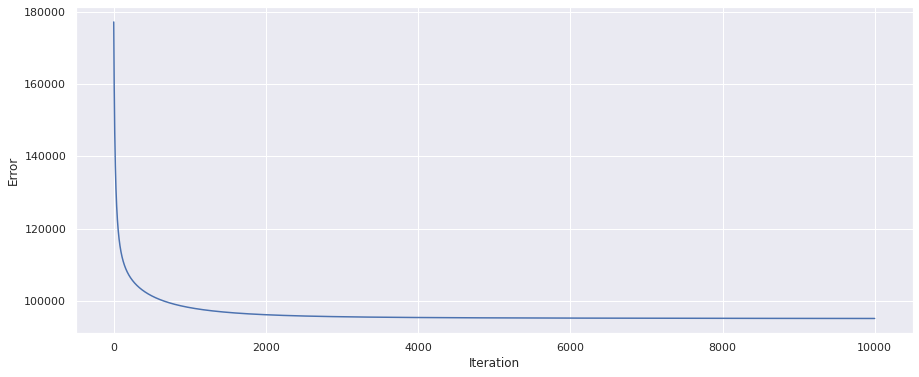

In [351]:
# Creating an Instance
import timeit
start = timeit.default_timer()
lr3 = LogisticRegression(tolerance=0, learningRate=0.1e-5, maxIteration=10000)
lr3.runModel()
stop = timeit.default_timer()
print('Time: ', round((stop - start),2), 'seconds')

### 2. SVM

#### 2.1 Original Data

In [397]:
# Splitting the dataset
X1 = data_encoded_1.copy()
X1.drop('income_50k', axis = 1, inplace = True)
y1 = data_encoded_1['income_50k']

In [398]:
class HardMarginSVM:
    
    def __init__(self, lRate = 0.00001, lamda = 0.001, n_iters=100):
        self.lRate = lRate
        self.lamda = lamda
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        samples, features = X.shape
        # Converting the 0 to -1 
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(features)
        self.b = 0
        for i in range(self.n_iters):
            for indx, x_i_value in enumerate(X):
                condition = y_[indx] * (np.dot(x_i_value, self.w) + self.b) >=1
                
                if condition:
                    self.w = self.w + self.lRate *(2 * self.lamda * self.w)
                else:
                    self.w = self.w - self.lRate*(2 * self.lamda * self.w - np.dot(x_i_value, y_[indx]))
                    self.b = self.b - self.lRate * (-y_[indx])
    
    def predict(self, X, Y):
        val = np.dot(X,self.w) + self.b
        y_hat_tst = np.sign(val)
        acc_value, prec_value, rec_value = self.evaluate(Y,y_hat_tst)
        print("The Accuracy value is:", np.round(acc_value,2)*100, "%")
        print("The Precision value is:", np.round(prec_value,2))
        print("The Recall value is:", np.round(rec_value,2))
    
    def evaluate(self,y,y_hat):
        y =(y==1)
        y_hat = (y_hat == 1)
        acc_value = (y == y_hat).sum() / y.size
        prec_value = (y & y_hat).sum() / y_hat.sum()
        rec_value = (y & y_hat).sum() / y.sum()
        return acc_value, prec_value, rec_value

In [399]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=21)

In [400]:
# Creating an instance
import timeit
start = timeit.default_timer()
svm = HardMarginSVM() 
svm.fit(np.array(X_train),np.array(y_train))
svm.predict(np.array(X_train),np.array(y_train))
stop = timeit.default_timer()
print('Time: ', round((stop - start),2), 'seconds')

The Accuracy value is: 94.0 %
The Precision value is: 0.94
The Recall value is: 1.0
Time:  147.58 seconds


#### 2.2 Undersampled dataset

In [401]:
# splitting the dataset
X1 = data_encoded_1.copy()
X1.drop('income_50k', axis = 1, inplace = True)
y1 = data_encoded_1['income_50k']

rus = RandomUnderSampler(random_state=21)
X_Usampled, y_Usampled = rus.fit_resample(X1, y1)

In [402]:
class HardMarginSVM:
    
    def __init__(self, lRate = 0.00001, lamda = 0.001, n_iters=100):
        self.lRate = lRate
        self.lamda = lamda
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        samples, features = X.shape
        # Converting the 0 to -1 
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(features)
        self.b = 0
        for i in range(self.n_iters):
            for indx, x_i_value in enumerate(X):
                condition = y_[indx] * (np.dot(x_i_value, self.w) + self.b) >=1
                
                if condition:
                    self.w = self.w + self.lRate *(2 * self.lamda * self.w)
                else:
                    self.w = self.w - self.lRate*(2 * self.lamda * self.w - np.dot(x_i_value, y_[indx]))
                    self.b = self.b - self.lRate * (-y_[indx])
    
    def predict(self, X, Y):
        val = np.dot(X,self.w) + self.b
        y_hat_tst = np.sign(val)
        acc_value, prec_value, rec_value = self.evaluate(Y,y_hat_tst)
        print("The Accuracy value is:",np.round(acc_value,2)*100, "%")
        print("The Precision value is:", np.round(prec_value,2))
        print("The Recall value is:", np.round(rec_value,2))
    
    def evaluate(self,y,y_hat):
        y =(y==1)
        y_hat = (y_hat == 1)
        acc_value = (y == y_hat).sum() / y.size
        prec_value = (y & y_hat).sum() / y_hat.sum()
        rec_value = (y & y_hat).sum() / y.sum()
        return acc_value, prec_value, rec_value

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X_Usampled, y_Usampled, test_size=0.3, random_state=21)

In [404]:
import timeit
start = timeit.default_timer()
clf = HardMarginSVM()
clf.fit(np.array(X_train),np.array(y_train))
clf.predict(np.array(X_train),np.array(y_train))
stop = timeit.default_timer()
print('Time: ', round((stop - start),2), 'seconds')

The Accuracy value is: 81.0 %
The Precision value is: 0.86
The Recall value is: 0.75
Time:  22.89 seconds


#### 2.3 Oversampled dataset

In [408]:
# splitting the dataset
X1 = data_encoded_1.copy()
X1.drop('income_50k', axis = 1, inplace = True)
y1 = data_encoded_1['income_50k']

ros = RandomOverSampler(random_state=21)
X_Osampled, y_Osampled = ros.fit_resample(X1, y1)

In [409]:
class HardMarginSVM:
    
    def __init__(self, lRate = 0.00001, lamda = 0.001, n_iters=100):
        self.lRate = lRate
        self.lamda = lamda
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        samples, features = X.shape
        # Converting the 0 to -1 
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(features)
        self.b = 0
        for i in range(self.n_iters):
            for indx, x_i_value in enumerate(X):
                condition = y_[indx] * (np.dot(x_i_value, self.w) + self.b) >=1
                
                if condition:
                    self.w = self.w + self.lRate *(2 * self.lamda * self.w)
                else:
                    self.w = self.w - self.lRate*(2 * self.lamda * self.w - np.dot(x_i_value, y_[indx]))
                    self.b = self.b - self.lRate * (-y_[indx])
    
    def predict(self, X, Y):
        val = np.dot(X,self.w) + self.b
        y_hat_tst = np.sign(val)
        acc_value, prec_value, rec_value = self.evaluate(Y,y_hat_tst)
        print("The Accuracy value is:",np.round(acc_value,2)*100, "%")
        print("The Precision value is:", np.round(prec_value,2))
        print("The Recall value is:", np.round(rec_value,2))
    
    def evaluate(self, y, y_hat):
        y = (y==1)
        y_hat = (y_hat == 1)
        acc_value = (y == y_hat).sum() / y.size
        prec_value = (y & y_hat).sum() / y_hat.sum()
        rec_value = (y & y_hat).sum() / y.sum()
        return acc_value, prec_value, rec_value

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X_Osampled, y_Osampled, test_size=0.3, random_state=21)

In [411]:
import timeit
start = timeit.default_timer()
clf = HardMarginSVM() 
clf.fit(np.array(X_train),np.array(y_train))
clf.predict(np.array(X_train),np.array(y_train))
stop = timeit.default_timer()
print('Time: ', round((stop - start),2), 'seconds')

The Accuracy value is: 83.0 %
The Precision value is: 0.86
The Recall value is: 0.79
Time:  303.87 seconds


#### 2.4 SMOTE

In [392]:
# splitting the dataset
X1 = data_encoded_1.copy()
X1.drop('income_50k', axis = 1, inplace = True)
y1 = data_encoded_1['income_50k']

sm = SMOTE(random_state=21)
X_SMOTE, y_SMOTE = sm.fit_resample(X1, y1)

In [405]:
class HardMarginSVM:
    
    def __init__(self, lRate = 0.00001, lamda = 0.001, n_iters=100):
        self.lRate = lRate
        self.lamda = lamda
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        samples, features = X.shape
        # Converting the 0 to -1 
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(features)
        self.b = 0
        for i in range(self.n_iters):
            for indx, x_i_value in enumerate(X):
                condition = y_[indx] * (np.dot(x_i_value, self.w) + self.b) >=1
                
                if condition:
                    self.w = self.w + self.lRate *(2 * self.lamda * self.w)
                else:
                    self.w = self.w - self.lRate*(2 * self.lamda * self.w - np.dot(x_i_value, y_[indx]))
                    self.b = self.b - self.lRate * (-y_[indx])
    
    def predict(self, X, Y):
        val = np.dot(X,self.w) + self.b
        y_hat_tst = np.sign(val)
        acc_value, prec_value, rec_value = self.evaluate(Y,y_hat_tst)
        print("The Accuracy value is:",np.round(acc_value,2)*100, "%")
        print("The Precision value is:", np.round(prec_value,2))
        print("The Recall value is:", np.round(rec_value,2))
    
    def evaluate(self,y,y_hat):
        y =(y==1)
        y_hat = (y_hat == 1)
        acc_value = (y == y_hat).sum() / y.size
        prec_value = (y & y_hat).sum() / y_hat.sum()
        rec_value = (y & y_hat).sum() / y.sum()
        return acc_value, prec_value, rec_value

In [406]:
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.3, random_state=21)

In [407]:
import timeit
start = timeit.default_timer()
clf = HardMarginSVM()
clf.fit(np.array(X_train),np.array(y_train))
clf.predict(np.array(X_train),np.array(y_train))
stop = timeit.default_timer()
print('Time: ', round((stop - start),2), 'seconds')

The Accuracy value is: 84.0 %
The Precision value is: 0.87
The Recall value is: 0.79
Time:  300.44 seconds


### 3. Naive Bayes

#### 3.1 Original Dataset

In [356]:
# Seperating the Training and Testing dataset
X1 = data_encoded.copy()
X1.drop('income_50k', axis = 1, inplace = True)
y1 = data_encoded['income_50k']

In [357]:
# Normalizing the dataset
def normalising(X1):
  mean = np.mean(X1.values)
  std = np.std(X1.values)
  X_norm = (X1.values - mean) / std
  return X_norm

In [358]:
display(normalising(X1))

array([[ 0.07597853, -0.14795026, -0.14488274, ..., -0.14488274,
        -0.14795026, -0.14795026],
       [ 0.02996577, -0.14488274, -0.14181522, ..., -0.14795026,
        -0.14795026, -0.14795026],
       [-0.09273494, -0.14795026, -0.14488274, ..., -0.14795026,
        -0.14795026, -0.14795026],
       ...,
       [-0.00377693, -0.14488274, -0.14795026, ..., -0.14795026,
        -0.14795026, -0.14795026],
       [-0.09886998, -0.14795026, -0.14488274, ..., -0.14795026,
        -0.14795026, -0.14795026],
       [-0.04978969, -0.14795026, -0.14181522, ..., -0.14795026,
        -0.14795026, -0.14795026]])

In [359]:
# Original data
class NaiveBayes:
  def __init__(self, X, y) -> None:
    self.X = X
    self.y = y
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size= 0.3, random_state=21)

  def fit_distribution(self,data):
    mean = np.mean(data)
    sigma = np.std(data)

    dist = norm(mean, sigma)
    return dist

  def x_mean(self,data):
    mean = np.mean(data)
    return mean

  def x_sigma(self,data):
    sigma = np.std(data)
    return sigma

  def calculate_likelihood(self,x,mean,sigma):
    lkhd = 1
    for n in range(len(mean)):
      exponent = exp(-((x[n]-mean[n])**2 / (2 * sigma[n]**2 )))
      c = (1 / (sqrt(2 * pi) * sigma[n])) * exponent
      lkhd = lkhd * c
    return lkhd
  
  def probability(self, X, prior, mean, sigma):
    return prior * self.calculate_likelihood(X,mean,sigma)

  def fit(self):

    self.X0_train = self.X_train[self.y_train == 0]
    self.X1_train = self.X_train[self.y_train == 1]

    self.prior_y0 = len(self.X0_train) / len(self.X_train)
    #print(self.prior_y0)
    self.prior_y1 = len(self.X1_train) / len(self.X_train)
    #print(self.prior_y1)

    self.X0_mean = []
    self.X1_mean = []
    self.X0_sigma = []
    self.X1_sigma = []
    for i in range(self.X0_train.shape[1]):
       self.X0_mean.append(self.x_mean(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_mean.append(self.x_mean(self.X1_train[:,i]))
    for i in range(self.X0_train.shape[1]):
       self.X0_sigma.append(self.x_sigma(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_sigma.append(self.x_sigma(self.X1_train[:,i]))

  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y_hat.sum()

    recall = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y.sum()

    f1score = 2 * (precision * recall) / (precision + recall)

    return f1score, recall, precision


  def predict(self):
    y_hat=[]
    for sample, target in zip(self.X_test, self.y_test):
      py0 = self.probability(sample, self.prior_y0, self.X0_mean, self.X0_sigma)
      py1 = self.probability(sample, self.prior_y1, self.X1_mean, self.X1_sigma)

      y_hat.append(np.argmax([py0*100,py1*100]))


      #print("P(y=0|%s) = %.3f" % (sample, py0*100))
      #print("P(y=1|%s) = %.3f" % (sample, py1*100))

      #print("Model predicted class {} and the truth was: {}\n".format(np.argmax([py0*100,py1*100]), target))
    
    print("Accuracy:", round(accuracy_score(self.y_test, y_hat),2)*100, '%')
    print("F1 score:", sklearn.metrics.f1_score(self.y_test, y_hat))
    print("Precision:", sklearn.metrics.precision_score(self.y_test, y_hat))
    print("Recall:", sklearn.metrics.recall_score(self.y_test, y_hat))

In [360]:
import timeit
start = timeit.default_timer()
nb = NaiveBayes(normalising(X1), y1.values)

In [361]:
nb.fit()

In [362]:
nb.predict()
stop = timeit.default_timer()
print('Time: ', round((stop - start),2), 'seconds')

Accuracy: 68.0 %
F1 score: 0.7964995550281816
Precision: 0.9852952740426201
Recall: 0.6684211462204599
Time:  13.12 seconds


#### 3.2 Undersampled dataset

In [363]:
# Undersampling the dataset
rus = RandomUnderSampler(random_state=21)
X_Usampled, y_Usampled = rus.fit_resample(X1, y1)

In [364]:
normalising(X_Usampled)

array([[-0.02163452, -0.14651027, -0.14955602, ..., -0.14955602,
        -0.14955602, -0.14955602],
       [-0.00640577, -0.14651027, -0.14955602, ..., -0.14955602,
        -0.14955602, -0.14955602],
       [-0.04904627, -0.14651027, -0.14346452, ..., -0.14955602,
        -0.14955602, -0.14955602],
       ...,
       [-0.12823577, -0.14651027, -0.14651027, ..., -0.14955602,
        -0.14955602, -0.14955602],
       [-0.13432727, -0.14651027, -0.14651027, ..., -0.14955602,
        -0.14955602, -0.14955602],
       [ 0.03623473, -0.14651027, -0.14651027, ..., -0.14955602,
        -0.14955602, -0.14955602]])

In [365]:
# Undersampled data
class NaiveBayes:
  def __init__(self, X, y) -> None:
    self.X = X
    self.y = y
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

  def fit_distribution(self,data):
    mean = np.mean(data)
    sigma = np.std(data)

    dist = norm(mean, sigma)
    return dist

  def x_mean(self,data):
    mean = np.mean(data)
    return mean

  def x_sigma(self,data):
    sigma = np.std(data)
    return sigma

  def calculate_likelihood(self,x,mean,sigma):
    lkhd = 1
    for n in range(len(mean)):
      exponent = exp(-((x[n]-mean[n])**2 / (2 * sigma[n]**2 )))
      c = (1 / (sqrt(2 * pi) * sigma[n])) * exponent
      lkhd = lkhd * c
    return lkhd
  
  def probability(self, X, prior, mean, sigma):
    return prior * self.calculate_likelihood(X,mean,sigma)

  def fit(self):

    self.X0_train = self.X_train[self.y_train == 0]
    self.X1_train = self.X_train[self.y_train == 1]

    self.prior_y0 = len(self.X0_train) / len(self.X_train)
    #print(self.prior_y0)
    self.prior_y1 = len(self.X1_train) / len(self.X_train)
    #print(self.prior_y1)

    self.X0_mean = []
    self.X1_mean = []
    self.X0_sigma = []
    self.X1_sigma = []
    for i in range(self.X0_train.shape[1]):
       self.X0_mean.append(self.x_mean(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_mean.append(self.x_mean(self.X1_train[:,i]))
    for i in range(self.X0_train.shape[1]):
       self.X0_sigma.append(self.x_sigma(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_sigma.append(self.x_sigma(self.X1_train[:,i]))

  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y_hat.sum()

    recall = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y.sum()

    f1score = 2 * (precision * recall) / (precision + recall)

    return f1score, recall, precision


  def predict(self):
    y_hat=[]
    for sample, target in zip(self.X_test, self.y_test):
      py0 = self.probability(sample, self.prior_y0, self.X0_mean, self.X0_sigma)
      py1 = self.probability(sample, self.prior_y1, self.X1_mean, self.X1_sigma)

      y_hat.append(np.argmax([py0*100,py1*100]))


      #print("P(y=0|%s) = %.3f" % (sample, py0*100))
      #print("P(y=1|%s) = %.3f" % (sample, py1*100))

      #print("Model predicted class {} and the truth was: {}\n".format(np.argmax([py0*100,py1*100]), target))
    
    print("Accuracy:", round(accuracy_score(self.y_test, y_hat),2)*100, '%')
    print("F1 score:", sklearn.metrics.f1_score(self.y_test, y_hat))
    print("Precision:", sklearn.metrics.precision_score(self.y_test, y_hat))
    print("Recall:", sklearn.metrics.recall_score(self.y_test, y_hat))

In [366]:
import timeit
start = timeit.default_timer()
nb_undersampled = NaiveBayes(normalising(X_Usampled), y_Usampled.values)

In [367]:
nb_undersampled.fit()

In [368]:
nb_undersampled.predict()
stop = timeit.default_timer()
print('Time: ', round((stop - start),2), 'seconds')

Accuracy: 76.0 %
F1 score: 0.7258413090460017
Precision: 0.843862167982771
Recall: 0.6367822318526544
Time:  3.69 seconds


#### 3.3 Oversampled Data

In [369]:
# Oversampling the dataset
rus = RandomOverSampler(random_state=21)
X_Osampled, y_Osampled = rus.fit_resample(X1, y1)

In [370]:
normalising(X_Osampled)

array([[ 0.07270296, -0.14951294, -0.14646889, ..., -0.14646889,
        -0.14951294, -0.14951294],
       [ 0.02704216, -0.14646889, -0.14342484, ..., -0.14951294,
        -0.14951294, -0.14951294],
       [-0.09471998, -0.14951294, -0.14646889, ..., -0.14951294,
        -0.14951294, -0.14951294],
       ...,
       [-0.00035432, -0.14646889, -0.14951294, ..., -0.14951294,
        -0.14951294, -0.14951294],
       [-0.01557459, -0.14646889, -0.14951294, ..., -0.14951294,
        -0.14951294, -0.14951294],
       [-0.00644243, -0.14646889, -0.14951294, ..., -0.14951294,
        -0.14951294, -0.14951294]])

In [371]:
# Oversampled data
class NaiveBayes:
  def __init__(self, X, y) -> None:
    self.X = X
    self.y = y
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size= 0.3, random_state=21)

  def fit_distribution(self,data):
    mean = np.mean(data)
    sigma = np.std(data)

    dist = norm(mean, sigma)
    return dist

  def x_mean(self,data):
    mean = np.mean(data)
    return mean

  def x_sigma(self,data):
    sigma = np.std(data)
    return sigma

  def calculate_likelihood(self,x,mean,sigma):
    lkhd = 1
    for n in range(len(mean)):
      exponent = exp(-((x[n]-mean[n])**2 / (2 * sigma[n]**2 )))
      c = (1 / (sqrt(2 * pi) * sigma[n])) * exponent
      lkhd = lkhd * c
    return lkhd
  
  def probability(self, X, prior, mean, sigma):
    return prior * self.calculate_likelihood(X,mean,sigma)

  def fit(self):

    self.X0_train = self.X_train[self.y_train == 0]
    self.X1_train = self.X_train[self.y_train == 1]

    self.prior_y0 = len(self.X0_train) / len(self.X_train)
    #print(self.prior_y0)
    self.prior_y1 = len(self.X1_train) / len(self.X_train)
    #print(self.prior_y1)

    self.X0_mean = []
    self.X1_mean = []
    self.X0_sigma = []
    self.X1_sigma = []
    for i in range(self.X0_train.shape[1]):
       self.X0_mean.append(self.x_mean(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_mean.append(self.x_mean(self.X1_train[:,i]))
    for i in range(self.X0_train.shape[1]):
       self.X0_sigma.append(self.x_sigma(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_sigma.append(self.x_sigma(self.X1_train[:,i]))

  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y_hat.sum()

    recall = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y.sum()

    f1score = 2 * (precision * recall) / (precision + recall)

    return f1score, recall, precision


  def predict(self):
    y_hat=[]
    for sample, target in zip(self.X_test, self.y_test):
      py0 = self.probability(sample, self.prior_y0, self.X0_mean, self.X0_sigma)
      py1 = self.probability(sample, self.prior_y1, self.X1_mean, self.X1_sigma)

      y_hat.append(np.argmax([py0*100,py1*100]))


      #print("P(y=0|%s) = %.3f" % (sample, py0*100))
      #print("P(y=1|%s) = %.3f" % (sample, py1*100))

      #print("Model predicted class {} and the truth was: {}\n".format(np.argmax([py0*100,py1*100]), target))
    
    print("Accuracy:", round(accuracy_score(self.y_test, y_hat),2)*100, '%')
    print("F1 score:", sklearn.metrics.f1_score(self.y_test, y_hat))
    print("Precision:", sklearn.metrics.precision_score(self.y_test, y_hat))
    print("Recall:", sklearn.metrics.recall_score(self.y_test, y_hat))

In [372]:
import timeit
start = timeit.default_timer()
nb_oversampled = NaiveBayes(normalising(X_Osampled), y_Osampled.values)

In [373]:
nb_oversampled.fit()

In [374]:
nb_oversampled.predict()
stop = timeit.default_timer()
print('Time: ', round((stop - start),2), 'seconds')

Accuracy: 76.0 %
F1 score: 0.7258303106445926
Precision: 0.8396390060947023
Recall: 0.6391912630714872
Time:  23.41 seconds


#### 3.4 SMOTE 

In [375]:
# Oversampling the dataset
sm = SMOTE(random_state=21)
X_SMOTE, y_SMOTE = sm.fit_resample(X1, y1)

In [376]:
normalising(X_SMOTE)

array([[ 0.07282167, -0.14938254, -0.14633865, ..., -0.14633865,
        -0.14938254, -0.14938254],
       [ 0.02716327, -0.14633865, -0.14329476, ..., -0.14938254,
        -0.14938254, -0.14938254],
       [-0.09459246, -0.14938254, -0.14633865, ..., -0.14938254,
        -0.14938254, -0.14938254],
       ...,
       [-0.01849513, -0.14633865, -0.14938254, ..., -0.14938254,
        -0.14938254, -0.14938254],
       [ 0.00281213, -0.14633865, -0.14938254, ..., -0.14938254,
        -0.14938254, -0.14938254],
       [ 0.0149877 , -0.14633865, -0.14633865, ..., -0.14938254,
        -0.14938254, -0.14938254]])

In [377]:
# Oversampled data
class NaiveBayes:
  def __init__(self, X, y) -> None:
    self.X = X
    self.y = y
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

  def fit_distribution(self,data):
    mean = np.mean(data)
    sigma = np.std(data)

    dist = norm(mean, sigma)
    return dist

  def x_mean(self,data):
    mean = np.mean(data)
    return mean

  def x_sigma(self,data):
    sigma = np.std(data)
    return sigma

  def calculate_likelihood(self,x,mean,sigma):
    lkhd = 1
    for n in range(len(mean)):
      exponent = exp(-((x[n]-mean[n])**2 / (2 * sigma[n]**2 )))
      c = (1 / (sqrt(2 * pi) * sigma[n])) * exponent
      lkhd = lkhd * c
    return lkhd
  
  def probability(self, X, prior, mean, sigma):
    return prior * self.calculate_likelihood(X,mean,sigma)

  def fit(self):

    self.X0_train = self.X_train[self.y_train == 0]
    self.X1_train = self.X_train[self.y_train == 1]

    self.prior_y0 = len(self.X0_train) / len(self.X_train)
    #print(self.prior_y0)
    self.prior_y1 = len(self.X1_train) / len(self.X_train)
    #print(self.prior_y1)

    self.X0_mean = []
    self.X1_mean = []
    self.X0_sigma = []
    self.X1_sigma = []
    for i in range(self.X0_train.shape[1]):
       self.X0_mean.append(self.x_mean(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_mean.append(self.x_mean(self.X1_train[:,i]))
    for i in range(self.X0_train.shape[1]):
       self.X0_sigma.append(self.x_sigma(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_sigma.append(self.x_sigma(self.X1_train[:,i]))

  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y_hat.sum()

    recall = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y.sum()

    f1score = 2 * (precision * recall) / (precision + recall)

    return f1score, recall, precision


  def predict(self):
    y_hat=[]
    for sample, target in zip(self.X_test, self.y_test):
      py0 = self.probability(sample, self.prior_y0, self.X0_mean, self.X0_sigma)
      py1 = self.probability(sample, self.prior_y1, self.X1_mean, self.X1_sigma)

      y_hat.append(np.argmax([py0*100,py1*100]))
    
    print("Accuracy:", round(accuracy_score(self.y_test, y_hat),2)*100, '%')
    print("F1 score:", sklearn.metrics.f1_score(self.y_test, y_hat))
    print("Precision:", sklearn.metrics.precision_score(self.y_test, y_hat))
    print("Recall:", sklearn.metrics.recall_score(self.y_test, y_hat))

In [378]:
import timeit
start = timeit.default_timer()
nb_smote = NaiveBayes(normalising(X_SMOTE), y_SMOTE.values)

In [379]:
nb_smote.fit()

In [380]:
nb_smote.predict()
stop = timeit.default_timer()
print('Time: ', round((stop - start),2), 'seconds')

Accuracy: 85.0 %
F1 score: 0.8318305848855143
Precision: 0.9416675993284835
Recall: 0.7449400598516105
Time:  23.67 seconds
